# Build ML models - for mostly full 7 KBps window

## Use Day 28: T cells CRISPROff vs. UNEDITED cells

Date: Aug. 1, 2025

In [1]:
# !  python3 -m pip install tensorflow
# !  python3 -m pip install keras
# ! python3 -m pip install 'scikit-learn'
# ! python3 -m pip install shap

In [2]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

from matplotlib import pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np
import time
import shap

import sklearn

# import shap
import sys
from pathlib import Path
from datetime import datetime
# Add the folder containing 'my_functions.py' to sys.path
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))

from funcs_analize_forward_reverse_extracted_mC_reads import plot_mCG_bars
from funcs_extract_mC_profiles_from_BAMs import (get_reference_sequence)

modkit found with expected version 0.2.4


In [3]:
# From /home/michalula/code/epiCausality/epiCode/PIPELINE_extract_plot_mCG_strands_profiles_bigger_window.ipynb
# CGs_all saved as CG_combined_silenced_T_primerES_nCATS_numFWD3852_numRVS2805_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy in dimelo_v2_output
# Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)

In [ ]:
CGs_all_silenced = np.load(
    "/home/michalula/code/epiCausality/epiCode/notebooks_development/T2T_v2.0_mapped/T_cells/day_28/dimelo_v2_output/" +
    "CG_142_padded_reads_day28_CROFF_Tcells_Thr0.9_NoFullyUnmethylated_T2Tv2_mCthresh0.9_t2t_v2_0_chr1:206583000-206590000_2025-08-02_units_combined_numFWD14_numRVS15.npy"
    )
    # "CG_142_units_combined_day28_CROFF_Tcells_ES_Thr0.99_NoFullyUnmethylated_T2Tv2_numFWD14_numRVS13_padded_reads_day28_CROFF_Tcells_ES_Thr0.99_NoFullyUnmethylated_T2Tv2_mCthresh0.99_t2t_v2_0_chr1:206583000-206590000_2025-08-01.npy"
   
    # "/home/michalula/code/epiCausality/epiCode/T2T_v2.0_mapped/T_cells/dimelo_v2_output/CG_142_units_combined_CROFF90prD6_Tcells_ES_Thr0.9_NoFullyUnmethylated_T2Tv2_numFWD4229_numRVS5859_padded_reads_CROFF90prD6_Tcells_ES_Thr0.9_NoFullyUnmethylated_T2Tv2_mCthresh0.9_t2t_v2_0_chr1:206583000-206590000_2025-03-24.npy")
    # "/home/michalula/code/epiCausality/epiCode/T2T_v2.0_mapped/T_cells/dimelo_v2_output/CG_142_units_combined_CROFF90prD6_Tcells_ES_Thr0.9_NoFullyUnmethylated_T2Tv2_numFWD4229_numRVS5859_padded_reads_CROFF90prD6_Tcells_ES_Thr0.9_NoFullyUnmethylated_T2Tv2_mCthresh0.9_t2t_v2_0_chr1:206583000-206590000_2025-03-18.npy")

# CGs_all_silenced = np.load("/home/michalula/code/epiCausality/epiCode/notebooks_debug/dimelo_v2_output/CG_142_units_combined_LOW_high_K562_nCATS_20241226_numFWD1576_numRVS1339_padded_reads_LOW_high_K562_nCATS_20241226_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-07.npy")
    # "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_142_units_combined_silenced_T_primerES_nCATS_numFWD5860_numRVS4229_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-04.npy")

# 142 CpG units: - 7KBps region:
# Theshold 0.9 =  /home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_142_units_combined_silenced_T_primerES_nCATS_numFWD5860_numRVS4229_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-04.npy

# 106 CpG units:
# Theshold 0.7 = # (
# Theshold 0.9 =   /home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_106_units_combined_silenced_T_primerES_nCATS_numFWD5306_numRVS3749_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206584662-206587693_2025-02-04.npy

# 16 CpG units:
# Threshold 0.7 = "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_16_units_combined_silenced_T_primerES_nCATS_numFWD4723_numRVS3383_padded_reads_silenced_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586012-206586343_2025-02-04.npy")
# Theshold 0.9 = "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_16_units_combined_silenced_T_primerES_nCATS_numFWD4511_numRVS3269_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586012-206586343_2025-02-04.npy")

# 12 CpG units:
# Threshold 0.7 = "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_12_units_combined_silenced_T_primerES_nCATS_numFWD4478_numRVS3217_padded_reads_silenced_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586112-206586243_2025-02-04.npy")
# Threshold 0.9 =(("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_12_units_combined_silenced_T_primerES_nCATS_numFWD4220_numRVS3073_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586112-206586243_2025-02-04.npy")
#
# ('/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_silenced_T_primerES_nCATS_numFWD3852_numRVS2805_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy')
# Silenced T cells nCATS:
# Threshold 0.7 = ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_silenced_T_primerES_nCATS_numFWD4132_numRVS2965_padded_reads_silenced_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy")
# # Threshold 0.9 =( '/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_silenced_T_primerES_nCATS_numFWD3852_numRVS2805_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy')

CGs_all_silenced, CGs_all_silenced.shape

(array([[nan,  1.,  1., ...,  1., nan, nan],
        [nan,  1.,  1., ..., nan, nan, nan],
        [nan,  1.,  1., ...,  1., nan, nan],
        ...,
        [nan, nan, nan, ...,  1.,  1., nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan,  1., ..., nan, nan, nan]]),
 (29, 142))

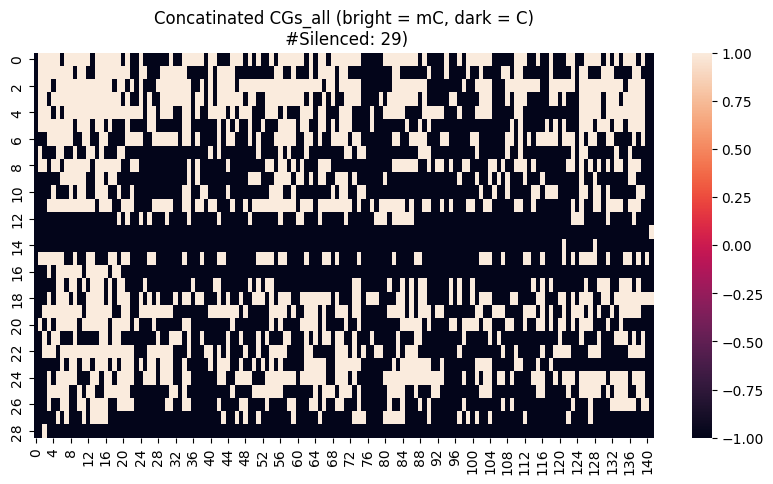

In [5]:
# plot X_unedited_silenced 

# Heatmap of CGs_all
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(CGs_all_silenced).fillna(-1))
plt.title(f"Concatinated CGs_all (bright = mC, dark = C)\n #Silenced: {CGs_all_silenced.shape[0]})")
plt.show()


In [6]:
CGs_all_silenced_full = CGs_all_silenced.copy()
CGs_all_silenced_full, CGs_all_silenced_full.shape

(array([[nan,  1.,  1., ...,  1., nan, nan],
        [nan,  1.,  1., ..., nan, nan, nan],
        [nan,  1.,  1., ...,  1., nan, nan],
        ...,
        [nan, nan, nan, ...,  1.,  1., nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan,  1., ..., nan, nan, nan]]),
 (29, 142))

In [7]:
# Remove rows from 3366 to 4116
CGs_all_silenced_cut = pd.DataFrame(CGs_all_silenced_full[np.r_[0:13, 16:25]]) #CGs_all_silenced_full.shape[0]]])
CGs_all_silenced_cut, CGs_all_silenced_cut.shape


(    0    1    2    3    4    5    6    7    8    9    ...  132  133  134  135  \
 0   NaN  1.0  1.0  1.0  1.0  1.0  NaN  1.0  1.0  1.0  ...  NaN  1.0  NaN  1.0   
 1   NaN  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  NaN  ...  1.0  NaN  NaN  NaN   
 2   NaN  1.0  1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  NaN   
 3   NaN  1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  NaN  1.0   
 4   NaN  1.0  1.0  1.0  NaN  1.0  NaN  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
 5   NaN  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  NaN  ...  NaN  1.0  1.0  NaN   
 6   NaN  NaN  NaN  1.0  1.0  1.0  1.0  1.0  1.0  NaN  ...  1.0  NaN  NaN  NaN   
 7   NaN  1.0  NaN  NaN  NaN  1.0  1.0  NaN  NaN  1.0  ...  NaN  1.0  NaN  NaN   
 8   NaN  1.0  1.0  NaN  1.0  1.0  NaN  1.0  1.0  1.0  ...  NaN  1.0  1.0  NaN   
 9   NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0  ...  NaN  NaN  NaN  NaN   
 10  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  1.0  NaN  ...  NaN  NaN  NaN  NaN   
 11  NaN  NaN  N

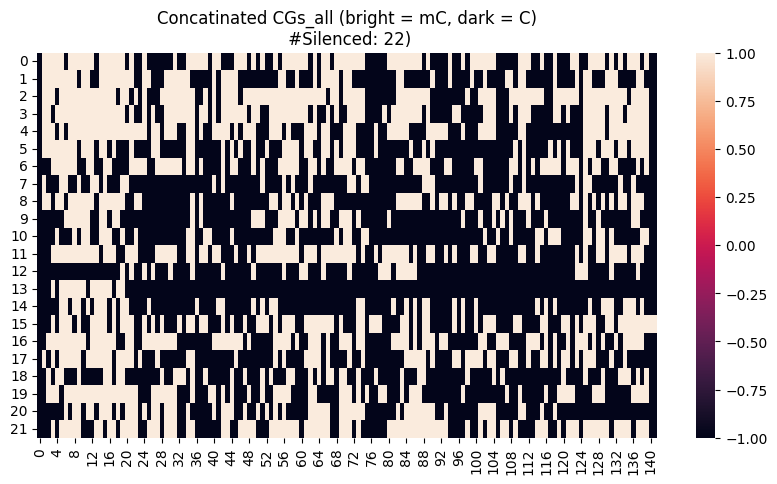

In [8]:
# Heatmap of CGs_all
plt.figure(figsize=(10, 5))
sns.heatmap(CGs_all_silenced_cut.fillna(-1))
plt.title(f"Concatinated CGs_all (bright = mC, dark = C)\n #Silenced: {CGs_all_silenced_cut.shape[0]})")
plt.show()

In [9]:
# # plot X_unedited_silenced 
# CGs_all_silenced_cut = pd.DataFrame(CGs_all_silenced_full[:-300]) #[:-1600])

# # Heatmap of CGs_all
# plt.figure(figsize=(10, 5))
# sns.heatmap(CGs_all_silenced_cut.fillna(-1))
# plt.title(f"Concatinated CGs_all (bright = mC, dark = C)\n #Silenced: {Gs_all_silenced_cut.shape[0]})")
# plt.show()


In [10]:
CGs_all_silenced, CGs_all_silenced.shape

(array([[nan,  1.,  1., ...,  1., nan, nan],
        [nan,  1.,  1., ..., nan, nan, nan],
        [nan,  1.,  1., ...,  1., nan, nan],
        ...,
        [nan, nan, nan, ...,  1.,  1., nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan,  1., ..., nan, nan, nan]]),
 (29, 142))

In [11]:
CGs_all_silenced = np.array(CGs_all_silenced_cut)
CGs_all_silenced, CGs_all_silenced.shape

(array([[nan,  1.,  1., ...,  1., nan, nan],
        [nan,  1.,  1., ..., nan, nan, nan],
        [nan,  1.,  1., ...,  1., nan, nan],
        ...,
        [nan, nan,  1., ...,  1., nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ...,  1., nan, nan]]),
 (22, 142))

In [12]:
CG_info_df = pd.read_csv('/home/michalula/code/epiCausality/epiCode/references/CG_coords/t2t_v2_0/CG_info_df_day6_CROFF90prD6_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_numFWD14_numRVS15_2025-08-01.csv')
    # '/home/michalula/code/epiCausality/epiCode/references/CG_coords/t2t_v2_0/t2tv2_CG_info_7Kb_region_chr1_206583000_206590000.bed', )
    # '/home/michalula/code/epiCausality/epiCode/T2T_v2.0_mapped/T_cells/dimelo_v2_output/CG_info_df_unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_numFWD1605_numRVS1949_2025-03-24.csv')

CG_info_df 

,Unnamed: 0,Position_in_region,Chromosome,Coordinate,CG_number
0,0,90,chr1,206583090,1
1,1,174,chr1,206583174,2
2,2,388,chr1,206583388,3
3,3,708,chr1,206583708,4
4,4,767,chr1,206583767,5
...,...,...,...,...,...
137,137,6437,chr1,206589437,138
138,138,6746,chr1,206589746,139
139,139,6862,chr1,206589862,140
140,140,6931,chr1,206589931,141


In [13]:
CG_pair_idx = CG_info_df['Position_in_region']
CG_pair_idx

0        90
1       174
2       388
3       708
4       767
       ... 
137    6437
138    6746
139    6862
140    6931
141    6956
Name: Position_in_region, Length: 142, dtype: int64

In [14]:
CGs_all_silenced_cut

,0,1,2,3,4,5,6,7,8,9,...,132,133,134,135,136,137,138,139,140,141
0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,...,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN
1,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
2,NaN,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN
3,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
5,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN
6,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
7,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
8,NaN,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,1.0,...,NaN,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN


# Unedited cells

In [15]:
CGs_all_unedited = np.load(
    "/home/michalula/code/epiCausality/epiCode/notebooks_development/T2T_v2.0_mapped/T_cells/day_28/dimelo_v2_output/"+
    "CG_142_padded_reads_day28_unedited_Tcells_Thr0.9_NoFullyUnmethylated_T2Tv2_mCthresh0.9_t2t_v2_0_chr1:206583000-206590000_2025-08-02_units_combined_numFWD21_numRVS35.npy"
) 
    # "/home/michalula/code/epiCausality/epiCode/T2T_v2.0_mapped/T_cells/dimelo_v2_output/CG_142_units_combined_unedited_Tcells_ES_Thr0.9_NoFullyUnmethylated_T2Tv2_numFWD1599_numRVS1940_padded_reads_unedited_Tcells_ES_Thr0.9_NoFullyUnmethylated_T2Tv2_mCthresh0.9_t2t_v2_0_chr1:206583000-206590000_2025-03-24.npy")
    # "/home/michalula/code/epiCausality/epiCode/T2T_v2.0_mapped/T_cells/dimelo_v2_output/CG_142_units_combined_unedited_Tcells_ES_Thr0.9_NoFullyUnmethylated_T2Tv2_numFWD1599_numRVS1940_padded_reads_unedited_Tcells_ES_Thr0.9_NoFullyUnmethylated_T2Tv2_mCthresh0.9_t2t_v2_0_chr1:206583000-206590000_2025-03-18.npy")

# CGs_all_unedited = np.load("/home/michalula/code/epiCausality/epiCode/notebooks_debug/dimelo_v2_output/CG_142_units_combined_unedited_K562_R9P2_nCATS_2024927_numFWD240_numRVS57_padded_reads_unedited_K562_R9P2_nCATS_2024927_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-07.npy")
    # "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_142_units_combined_unedited_T_primerES_nCATS_numFWD1940_numRVS1599_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-04.npy")

# 142 CpG units: - 7KBps region:
# Threshold 0.9 = ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_142_units_combined_unedited_T_primerES_nCATS_numFWD1940_numRVS1599_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-04.npy")


# 106 CpG units:
# Threshold 0.9 =  /home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_106_units_combined_unedited_T_primerES_nCATS_numFWD1760_numRVS1398_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206584662-206587693_2025-02-04.npy

# 16 CpG units:
# Threshold 0.7 = "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_16_units_combined_unedited_T_primerES_nCATS_numFWD1345_numRVS949_padded_reads_unedited_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586012-206586343_2025-02-04.npy")
# Threshold 0.9 =    "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_16_units_combined_unedited_T_primerES_nCATS_numFWD1058_numRVS795_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586012-206586343_2025-02-04.npy")

# 12 CpG units:
# Threshold 0.7 = "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_12_units_combined_unedited_T_primerES_nCATS_numFWD1180_numRVS746_padded_reads_unedited_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586112-206586243_2025-02-04.npy")
# Threshold 0.9 = ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_12_units_combined_unedited_T_primerES_nCATS_numFWD881_numRVS598_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586112-206586243_2025-02-04.npy")

# ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_unedited_T_primerES_nCATS_numFWD788_numRVS516_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy")

# Unedited T cells nCATS:
# Threshold 0.7 =  ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_unedited_T_primerES_nCATS_numFWD1081_numRVS662_padded_reads_unedited_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy")
# Threshold 0.9 =("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_unedited_T_primerES_nCATS_numFWD788_numRVS516_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy")

CGs_all_unedited, CGs_all_unedited.shape

(array([[nan,  1.,  1., ...,  1., nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan,  1., nan, ...,  1., nan, nan],
        ...,
        [nan, nan, nan, ..., nan,  1., nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ...,  1., nan, nan]]),
 (56, 142))

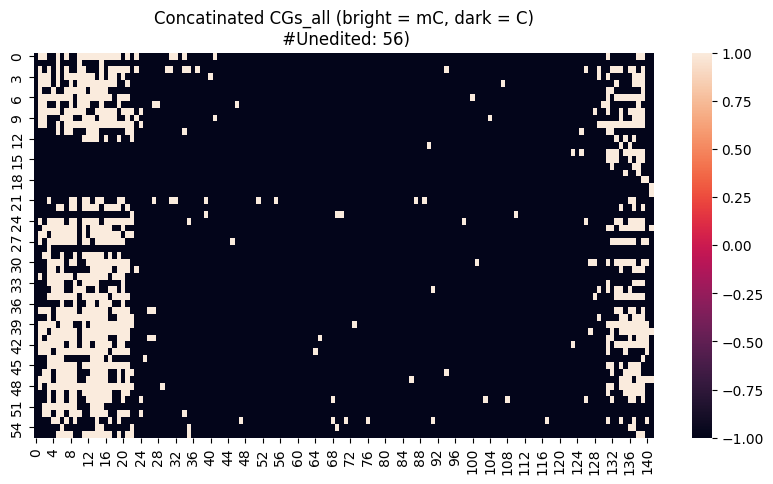

In [16]:
# plot X_unedited_silenced 

# Heatmap of CGs_all
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(CGs_all_unedited).fillna(-1))
plt.title(f"Concatinated CGs_all (bright = mC, dark = C)\n #Unedited: {CGs_all_unedited.shape[0]})")
plt.show()


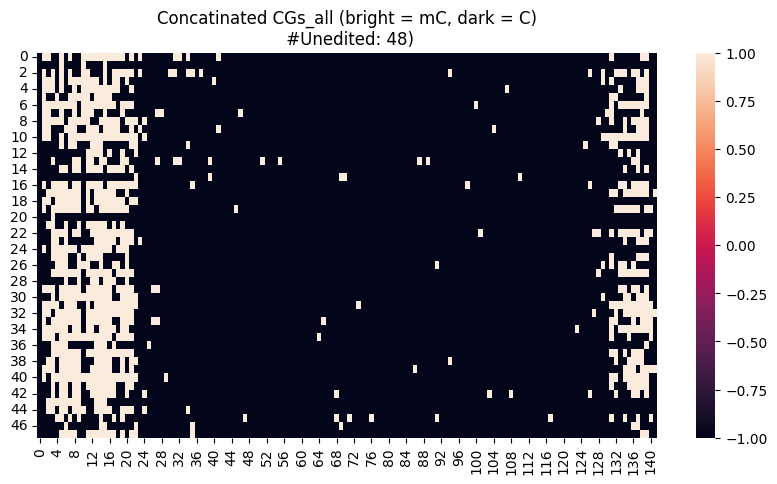

In [17]:
# Remove rows from 3366 to 4116
CGs_all_unedited_cut = pd.DataFrame(CGs_all_unedited[np.r_[0:13, 21:56]]) #CGs_all_silenced_full.shape[0]]])
CGs_all_unedited_cut, CGs_all_unedited_cut.shape


# Heatmap of CGs_all
plt.figure(figsize=(10, 5))
sns.heatmap(CGs_all_unedited_cut.fillna(-1))
plt.title(f"Concatinated CGs_all (bright = mC, dark = C)\n #Unedited: {CGs_all_unedited_cut.shape[0]})")
plt.show()

In [18]:
# # plot X_unedited_silenced 
# CGs_all_unedited_cut = pd.DataFrame(CGs_all_unedited[:-16]) #[:-400])

# # Heatmap of CGs_all
# plt.figure(figsize=(10, 5))
# sns.heatmap(CGs_all_unedited_cut.fillna(-1))
# plt.title(f"Concatinated CGs_all (bright = mC, dark = C)\n #Silenced: {CGs_all_unedited_cut.shape[0]})")
# plt.show()


In [19]:
CGs_all_unedited = np.array(CGs_all_unedited_cut)
CGs_all_unedited, CGs_all_unedited.shape

(array([[nan,  1.,  1., ...,  1., nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan,  1., nan, ...,  1., nan, nan],
        ...,
        [nan, nan, nan, ..., nan,  1., nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ...,  1., nan, nan]]),
 (48, 142))

# Plot the data bars

GCCATTGCCTCAATTCAGTTCTCCATACTCTCCCTAAACTAAACTCCTTACTATTCCTGGAATCAACAGGACTGACCCCAAACCTTTGTTCGTATCTCATCTCTTTTCCTATTTTTGCCCTATTGCATTGACACTTGTCATATTTAGTTGAATCACTGGGCCTTTAGCCTTCCCCGCTCCAATTACCACACTCCCTTCTTTCCTTTCTGAAGCCCCATACCACTTTGGTTGTGATATTTGTATAGCATTTATCATGGAAAACCTCCCTACTAGATTGTAGATTCTCAAACACAAGTATTGACACTTAGTGGGTTTCTGTATACTAGGGAAGTTTATTAAACAGTCTTTGATTTAGTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTT

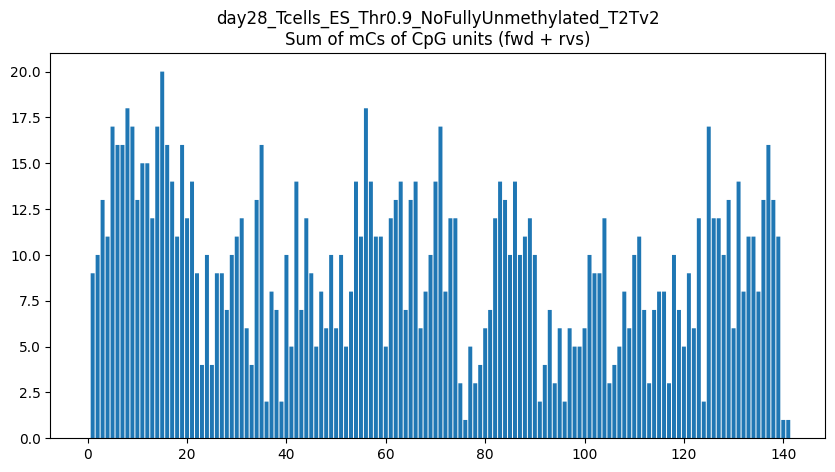

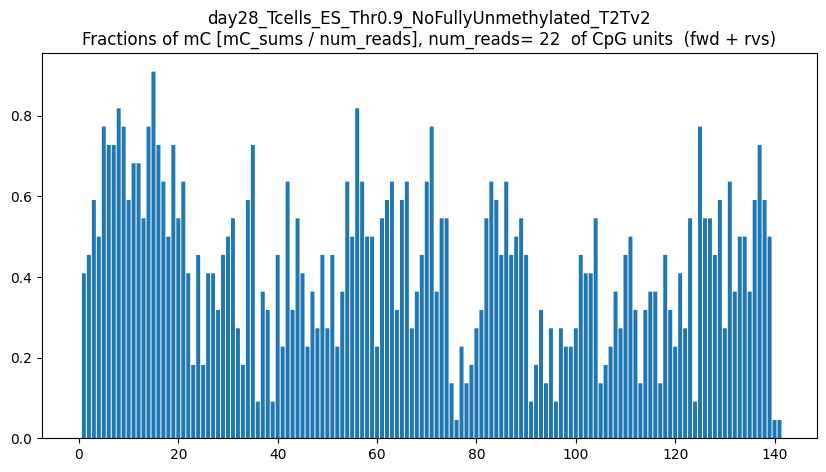

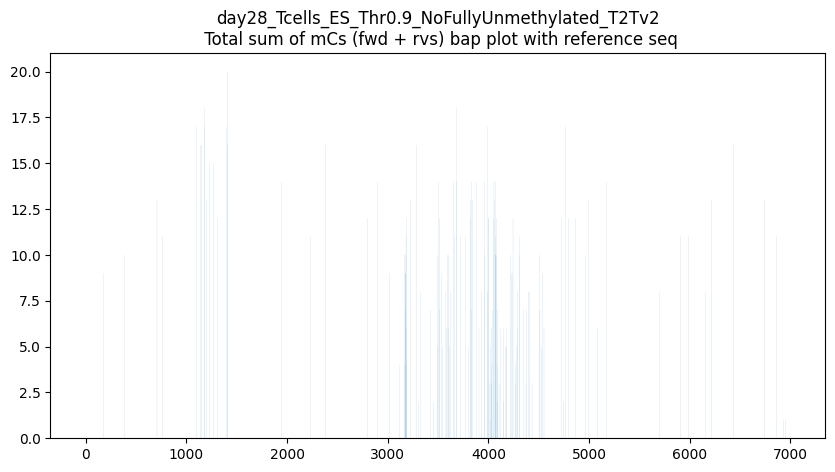

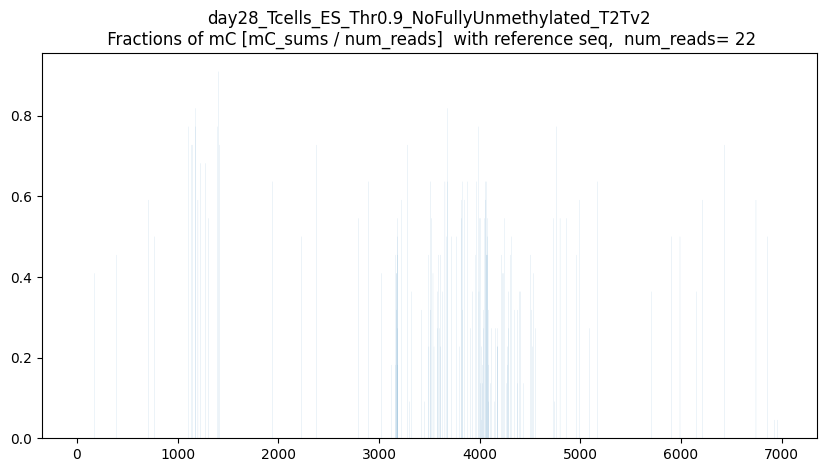

In [20]:
# Make sure to use UpperCase fasta in the Reference genome, so that the mapping of the sequence is got giving erorrs
# awk '{if ($0 ~ /^>/) print $0; else print toupper($0)}' /home/michalula/data/ref_genomes/t2t_v2_0/chm13v2.0.fa > /home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta
# samtools faidx /home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta
ref_genome_path = Path('/home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta')
# '/home/michalula/data/ref_genomes/t2t_v2_0/chm13v2.0.fa')
reg_genome_version = "t2t_v2_0"
# t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
region_chr = 'chr1'
# region_start = 206586162
# region_end = 206586192
# # Expend window size
# expand_window_size = 50 # 500 #500 #1500 # 0 
# expand_window_size
# print("Expend window size by 2 * ", expand_window_size)
# region_start = 206586162 - expand_window_size
# region_end = 206586192 + expand_window_size + 1

# FULL 7 KB WINDOW: 1:206583000-206590000
region_start = 206583000   # 206586162
region_end = 206590000 # 20658619

CG_pair_idx = np.asarray(CG_pair_idx)
CG_pair_idx.shape

date_today = datetime.today().strftime('%Y-%m-%d')

ref_seq_list = get_reference_sequence(ref_genome_path, region_chr, region_start, region_end)

experiment_name = "day28_Tcells_ES_Thr0.9_NoFullyUnmethylated_T2Tv2"
plot_mCG_bars(CGs_all_silenced_cut, CG_pair_idx, ref_seq_list, experiment_name)


CGs_all_sums  = [ 0. 22. 20. 31. 22. 37. 33. 27. 34. 31. 16. 33. 31. 36. 40. 39. 33. 28.
 21. 30. 28. 27. 13.  4.  4.  1.  2.  4.  1.  1.  1.  3.  2.  0.  4.  4.
  0.  1.  0.  2.  1.  2.  0.  0.  0.  1.  1.  1.  0.  0.  0.  1.  0.  0.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  2.  2.  1.  1.
  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.
  0.  2.  0.  0.  2.  0.  0.  0.  1.  0.  1.  1.  0.  1.  1.  0.  0.  1.
  1.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  1.
  3.  2.  3.  5.  2. 20. 13. 13. 22. 16. 23. 29. 24. 29.  9.  3.]
CGs_all_sums / len(CGs_all) = [0.         0.45833333 0.41666667 0.64583333 0.45833333 0.77083333
 0.6875     0.5625     0.70833333 0.64583333 0.33333333 0.6875
 0.64583333 0.75       0.83333333 0.8125     0.6875     0.58333333
 0.4375     0.625      0.58333333 0.5625     0.27083333 0.08333333
 0.08333333 0.02083333 0.04166667 0.08333333 0.02083333 0.02083333
 0.02083333 0.0625     0.04166667 0.         0

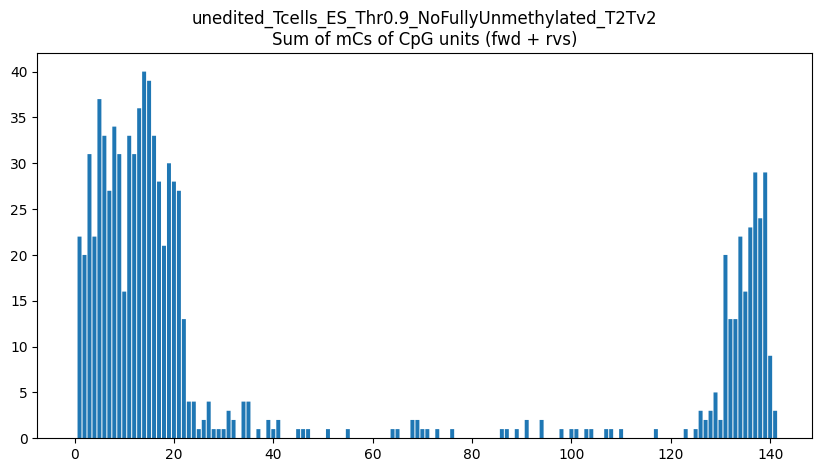

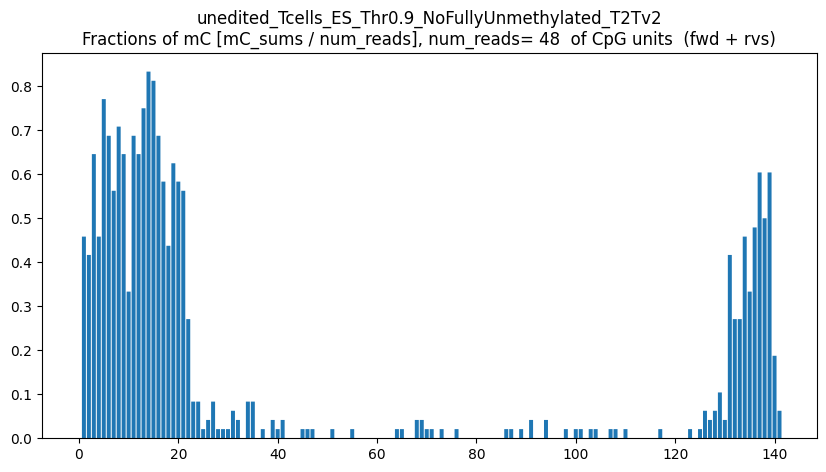

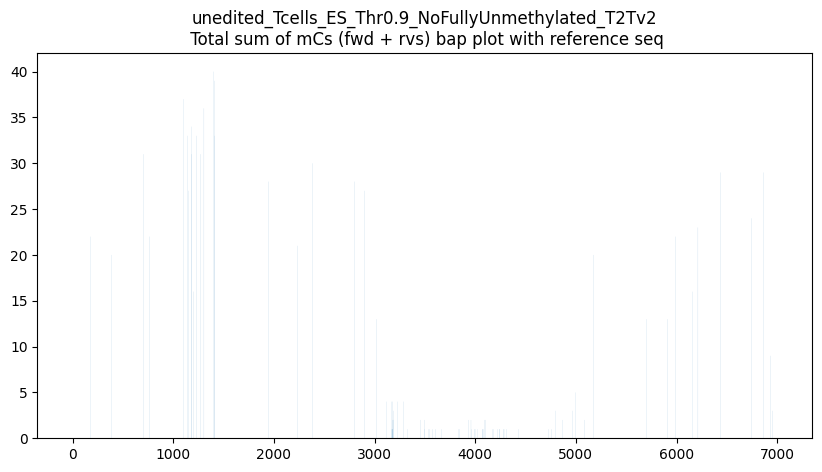

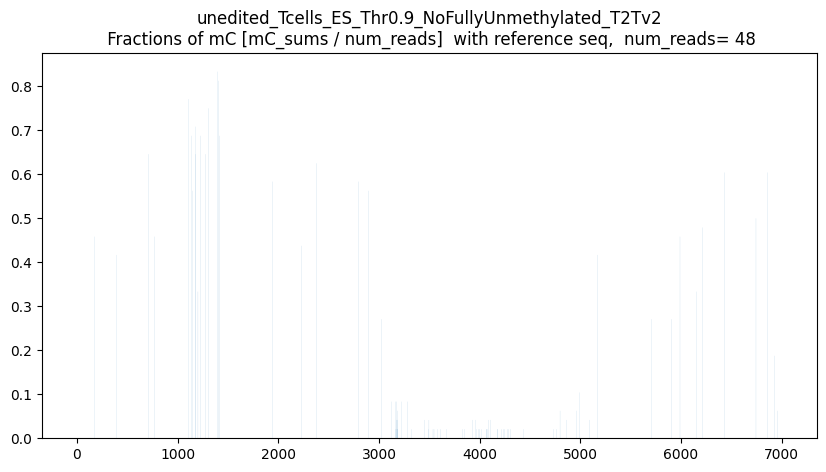

In [21]:
experiment_name = "unedited_Tcells_ES_Thr0.9_NoFullyUnmethylated_T2Tv2"
plot_mCG_bars(CGs_all_unedited_cut, CG_pair_idx, ref_seq_list, experiment_name)


# Plot together the CG fractions

In [22]:
np.nansum(CGs_all_unedited_cut.values, axis=0) / len(CGs_all_unedited_cut)

array([0.        , 0.45833333, 0.41666667, 0.64583333, 0.45833333,
       0.77083333, 0.6875    , 0.5625    , 0.70833333, 0.64583333,
       0.33333333, 0.6875    , 0.64583333, 0.75      , 0.83333333,
       0.8125    , 0.6875    , 0.58333333, 0.4375    , 0.625     ,
       0.58333333, 0.5625    , 0.27083333, 0.08333333, 0.08333333,
       0.02083333, 0.04166667, 0.08333333, 0.02083333, 0.02083333,
       0.02083333, 0.0625    , 0.04166667, 0.        , 0.08333333,
       0.08333333, 0.        , 0.02083333, 0.        , 0.04166667,
       0.02083333, 0.04166667, 0.        , 0.        , 0.        ,
       0.02083333, 0.02083333, 0.02083333, 0.        , 0.        ,
       0.        , 0.02083333, 0.        , 0.        , 0.        ,
       0.02083333, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02083333,
       0.02083333, 0.        , 0.        , 0.04166667, 0.04166667,
       0.02083333, 0.02083333, 0.        , 0.02083333, 0.     

In [23]:
len(CGs_all_unedited_cut)

48

In [24]:
# CGs_all_unedited_cut
CGs_all = CGs_all_unedited_cut
CGs_all_sums = np.nansum(CGs_all.values, axis=0)
CGs_all_on_fwd_C_sums = np.zeros(len(ref_seq_list))
CGs_all_on_fwd_C_sums[CG_pair_idx] = CGs_all_sums
mC_fracs = CGs_all_sums / len(CGs_all)
print("CGs_all_sums  =", CGs_all_sums)
print("CGs_all_sums / len(CGs_all) =", CGs_all_sums / len(CGs_all))


CGs_all_sums  = [ 0. 22. 20. 31. 22. 37. 33. 27. 34. 31. 16. 33. 31. 36. 40. 39. 33. 28.
 21. 30. 28. 27. 13.  4.  4.  1.  2.  4.  1.  1.  1.  3.  2.  0.  4.  4.
  0.  1.  0.  2.  1.  2.  0.  0.  0.  1.  1.  1.  0.  0.  0.  1.  0.  0.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  2.  2.  1.  1.
  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.
  0.  2.  0.  0.  2.  0.  0.  0.  1.  0.  1.  1.  0.  1.  1.  0.  0.  1.
  1.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  1.
  3.  2.  3.  5.  2. 20. 13. 13. 22. 16. 23. 29. 24. 29.  9.  3.]
CGs_all_sums / len(CGs_all) = [0.         0.45833333 0.41666667 0.64583333 0.45833333 0.77083333
 0.6875     0.5625     0.70833333 0.64583333 0.33333333 0.6875
 0.64583333 0.75       0.83333333 0.8125     0.6875     0.58333333
 0.4375     0.625      0.58333333 0.5625     0.27083333 0.08333333
 0.08333333 0.02083333 0.04166667 0.08333333 0.02083333 0.02083333
 0.02083333 0.0625     0.04166667 0.         0

In [25]:
CGs_all_silenced_cut_frac

NameError: name 'CGs_all_silenced_cut_frac' is not defined

In [ ]:
len(CGs_all_unedited_cut) 

3064

In [ ]:
len(CGs_all_silenced_cut_sums) 

142

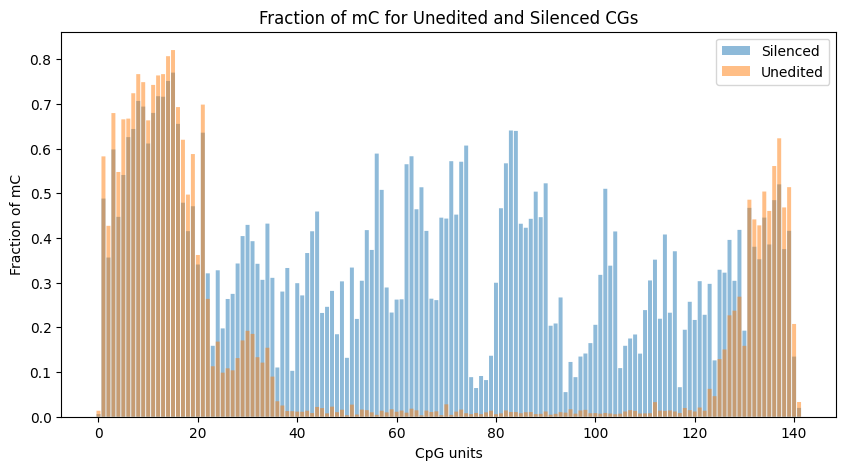

In [ ]:
# import matplotlib.pyplot as plt

# # Calculate the fraction of mC for both DataFrames
# CGs_all_unedited_cut['fraction_mC'] = CGs_all_unedited_cut['mC_sums'] / CGs_all_unedited_cut['num_reads']
# CGs_all_silenced_cut['fraction_mC'] = CGs_all_silenced_cut['mC_sums'] / CGs_all_silenced_cut['num_reads']

CGs_all_unedited_cut_sums = np.nansum(CGs_all_unedited_cut.values, axis=0) 
CGs_all_unedited_cut_frac = CGs_all_unedited_cut_sums / len(CGs_all_unedited_cut) 

CGs_all_silenced_cut_sums = np.nansum(CGs_all_silenced_cut.values, axis=0) 
CGs_all_silenced_cut_frac = CGs_all_silenced_cut_sums / len(CGs_all_silenced_cut) 

# Plot the fraction mC for CGs_all_unedited_cut
# plt.bar(CGs_all_unedited_cut.index, CGs_all_unedited_cut_frac, alpha=0.5, label='Unedited')

plt.figure(figsize=(10, 5))
# Plot the fraction mC for CGs_all_silenced_cut
plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_silenced_cut_frac, snap=False, alpha=0.5, label='Silenced')

plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_unedited_cut_frac, snap=False, alpha=0.5, label='Unedited')
# plt.title(f"{experiment_name}\nSum of mCs of CpG units (fwd + rvs)")
# plt.show()

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited and Silenced CGs')
plt.legend()

# Show the plot
plt.show()

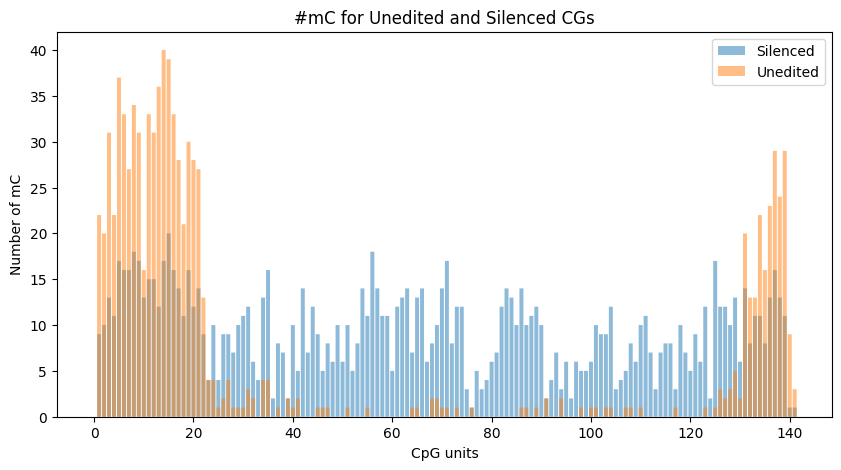

In [ ]:
# import matplotlib.pyplot as plt

# # Calculate the fraction of mC for both DataFrames
# CGs_all_unedited_cut['fraction_mC'] = CGs_all_unedited_cut['mC_sums'] / CGs_all_unedited_cut['num_reads']
# CGs_all_silenced_cut['fraction_mC'] = CGs_all_silenced_cut['mC_sums'] / CGs_all_silenced_cut['num_reads']

CGs_all_unedited_cut_sums = np.nansum(CGs_all_unedited_cut.values, axis=0) 
CGs_all_unedited_cut_frac = CGs_all_unedited_cut_sums / len(CGs_all_unedited_cut) 

CGs_all_silenced_cut_sums = np.nansum(CGs_all_silenced_cut.values, axis=0) 
CGs_all_silenced_cut_frac = CGs_all_silenced_cut_sums / len(CGs_all_silenced_cut) 

# Plot the fraction mC for CGs_all_unedited_cut
# plt.bar(CGs_all_unedited_cut.index, CGs_all_unedited_cut_frac, alpha=0.5, label='Unedited')

plt.figure(figsize=(10, 5))
# Plot the fraction mC for CGs_all_silenced_cut
plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_silenced_cut_sums, snap=False, alpha=0.5, label='Silenced')

plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_unedited_cut_sums, snap=False, alpha=0.5, label='Unedited')
# plt.title(f"{experiment_name}\nSum of mCs of CpG units (fwd + rvs)")
# plt.show()

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Number of mC')
plt.title('#mC for Unedited and Silenced CGs')
plt.legend()

# Show the plot
plt.show()

# Plot with sequences 

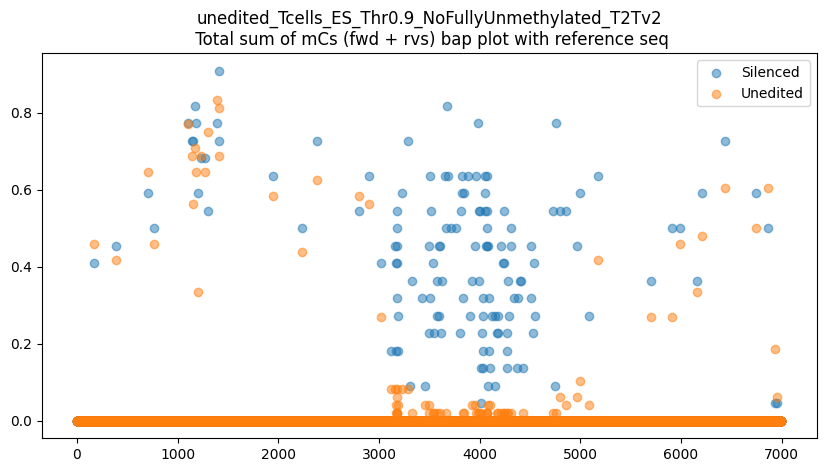

In [ ]:
CGs_all_on_fwd_C_sums#[CG_pair_idx] = CGs_all_silenced_cut_sums

# CGs_all_unedited_cut
# CGs_all = CGs_all_unedited_cut
# CGs_all_sums = np.nansum(CGs_all_unedited_cut.values, axis=0)
CGs_all_on_fwd_C_sums_unedited = np.zeros(len(ref_seq_list))
CGs_all_on_fwd_C_sums_unedited[CG_pair_idx] = CGs_all_unedited_cut_frac #CGs_all_sums


# CGs_all_sums = np.nansum(CGs_all_silenced_cut.values, axis=0)
CGs_all_on_fwd_C_sums_silenced = np.zeros(len(ref_seq_list))
CGs_all_on_fwd_C_sums_silenced[CG_pair_idx] =  CGs_all_silenced_cut_frac # CGs_all_sums
# mC_fracs = CGs_all_sums / len(CGs_all)


plt.figure(figsize=(10, 5))
# plt.bar(np.arange(len(CGs_all_on_fwd_C_sums_silenced)), CGs_all_on_fwd_C_sums_silenced, snap=False, alpha=0.5, label='Silenced') # , width=0.0001
# plt.bar(np.arange(len(CGs_all_on_fwd_C_sums_unedited)), CGs_all_on_fwd_C_sums_unedited, snap=False, alpha=0.5, label='Unedited') # , width=0.0001
plt.scatter(np.arange(len(CGs_all_on_fwd_C_sums_silenced)), CGs_all_on_fwd_C_sums_silenced, snap=False, alpha=0.5, label='Silenced') # , width=0.0001
plt.scatter(np.arange(len(CGs_all_on_fwd_C_sums_unedited)), CGs_all_on_fwd_C_sums_unedited, snap=False, alpha=0.5, label='Unedited') # , width=0.0001
#
# if len(ref_seq_list) < 160:       
#     plt.xticks(ticks=np.arange(len(ref_seq_list)), labels=ref_seq_list, size=font_size) # 'small') #, rotation=90)
plt.title(f"{experiment_name}\n Total sum of mCs (fwd + rvs) bap plot with reference seq")
plt.legend()
plt.show()

# mC_fracs = CGs_all_on_fwd_C_sums / len(CGs_all)
# plt.figure(figsize=(10, 5))
# plt.bar(np.arange(len(mC_fracs)), mC_fracs, snap=False) # , width=0.0001
# if len(ref_seq_list) < 160:               
#     plt.xticks(ticks=np.arange(len(ref_seq_list)), labels=ref_seq_list, size=font_size) # 'small') #, rotation=90)
# plt.title(f"{experiment_name}\n Fractions of mC [mC_sums / num_reads]  with reference seq,  num_reads= {len(CGs_all)}")
# plt.show()


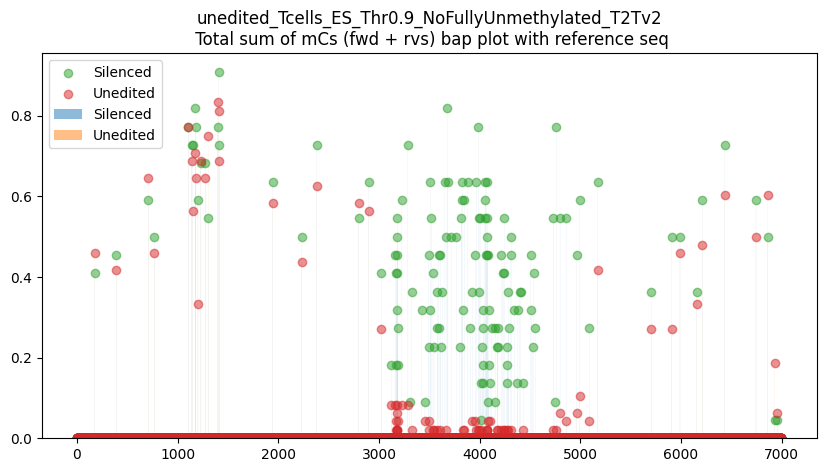

In [ ]:
CGs_all_on_fwd_C_sums#[CG_pair_idx] = CGs_all_silenced_cut_sums

# CGs_all_unedited_cut
# CGs_all = CGs_all_unedited_cut
# CGs_all_sums = np.nansum(CGs_all_unedited_cut.values, axis=0)
CGs_all_on_fwd_C_sums_unedited = np.zeros(len(ref_seq_list))
CGs_all_on_fwd_C_sums_unedited[CG_pair_idx] = CGs_all_unedited_cut_frac #CGs_all_sums


# CGs_all_sums = np.nansum(CGs_all_silenced_cut.values, axis=0)
CGs_all_on_fwd_C_sums_silenced = np.zeros(len(ref_seq_list))
CGs_all_on_fwd_C_sums_silenced[CG_pair_idx] =  CGs_all_silenced_cut_frac # CGs_all_sums
# mC_fracs = CGs_all_sums / len(CGs_all)


plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(CGs_all_on_fwd_C_sums_silenced)), CGs_all_on_fwd_C_sums_silenced, snap=False, alpha=0.5, label='Silenced') # , width=0.0001
plt.bar(np.arange(len(CGs_all_on_fwd_C_sums_unedited)), CGs_all_on_fwd_C_sums_unedited, snap=False, alpha=0.5, label='Unedited') # , width=0.0001
plt.scatter(np.arange(len(CGs_all_on_fwd_C_sums_silenced)), CGs_all_on_fwd_C_sums_silenced, snap=False, alpha=0.5, label='Silenced') # , width=0.0001
plt.scatter(np.arange(len(CGs_all_on_fwd_C_sums_unedited)), CGs_all_on_fwd_C_sums_unedited, snap=False, alpha=0.5, label='Unedited') # , width=0.0001
#
# if len(ref_seq_list) < 160:       
#     plt.xticks(ticks=np.arange(len(ref_seq_list)), labels=ref_seq_list, size=font_size) # 'small') #, rotation=90)
plt.title(f"{experiment_name}\n Total sum of mCs (fwd + rvs) bap plot with reference seq")
plt.legend()
plt.show()

# mC_fracs = CGs_all_on_fwd_C_sums / len(CGs_all)
# plt.figure(figsize=(10, 5))
# plt.bar(np.arange(len(mC_fracs)), mC_fracs, snap=False) # , width=0.0001
# if len(ref_seq_list) < 160:               
#     plt.xticks(ticks=np.arange(len(ref_seq_list)), labels=ref_seq_list, size=font_size) # 'small') #, rotation=90)
# plt.title(f"{experiment_name}\n Fractions of mC [mC_sums / num_reads]  with reference seq,  num_reads= {len(CGs_all)}")
# plt.show()


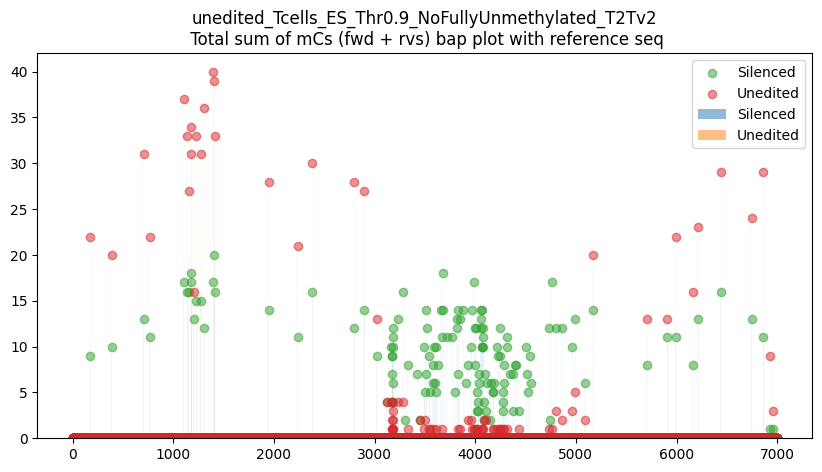

In [ ]:
CGs_all_on_fwd_C_sums#[CG_pair_idx] = CGs_all_silenced_cut_sums

# CGs_all_unedited_cut
# CGs_all = CGs_all_unedited_cut
CGs_all_sums = np.nansum(CGs_all_unedited_cut.values, axis=0)
CGs_all_on_fwd_C_sums_unedited = np.zeros(len(ref_seq_list))
CGs_all_on_fwd_C_sums_unedited[CG_pair_idx] = CGs_all_sums


CGs_all_sums = np.nansum(CGs_all_silenced_cut.values, axis=0)
CGs_all_on_fwd_C_sums_silenced = np.zeros(len(ref_seq_list))
CGs_all_on_fwd_C_sums_silenced[CG_pair_idx] = CGs_all_sums
# mC_fracs = CGs_all_sums / len(CGs_all)


plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(CGs_all_on_fwd_C_sums_silenced)), CGs_all_on_fwd_C_sums_silenced, snap=False, alpha=0.5, label='Silenced') # , width=0.0001
plt.bar(np.arange(len(CGs_all_on_fwd_C_sums_unedited)), CGs_all_on_fwd_C_sums_unedited, snap=False, alpha=0.5, label='Unedited') # , width=0.0001
plt.scatter(np.arange(len(CGs_all_on_fwd_C_sums_silenced)), CGs_all_on_fwd_C_sums_silenced, snap=False, alpha=0.5, label='Silenced') # , width=0.0001
plt.scatter(np.arange(len(CGs_all_on_fwd_C_sums_unedited)), CGs_all_on_fwd_C_sums_unedited, snap=False, alpha=0.5, label='Unedited') # , width=0.0001
# if len(ref_seq_list) < 160:       
#     plt.xticks(ticks=np.arange(len(ref_seq_list)), labels=ref_seq_list, size=font_size) # 'small') #, rotation=90)
plt.title(f"{experiment_name}\n Total sum of mCs (fwd + rvs) bap plot with reference seq")
plt.legend()
plt.show()

# mC_fracs = CGs_all_on_fwd_C_sums / len(CGs_all)
# plt.figure(figsize=(10, 5))
# plt.bar(np.arange(len(mC_fracs)), mC_fracs, snap=False) # , width=0.0001
# if len(ref_seq_list) < 160:               
#     plt.xticks(ticks=np.arange(len(ref_seq_list)), labels=ref_seq_list, size=font_size) # 'small') #, rotation=90)
# plt.title(f"{experiment_name}\n Fractions of mC [mC_sums / num_reads]  with reference seq,  num_reads= {len(CGs_all)}")
# plt.show()


# Taking a subset of the bigger set to have equal positive and negative samples

In [ ]:
max(CGs_all_silenced.shape[0], CGs_all_unedited.shape[0]) , min(CGs_all_silenced.shape[0], CGs_all_unedited.shape[0])

(48, 22)

In [ ]:
# Assuming CGs_all_silenced is your NumPy array of shape (6657, 10)
num_rows = CGs_all_unedited.shape[0]  # Total number of rows
subset_size = CGs_all_silenced.shape[0] # 1743 # 1304  # Define how many rows you want to randomly select
print('subset_size = ', subset_size)

# Randomly select row indices
random_indices = np.random.choice(num_rows, subset_size, replace=False)

# Get the subset
subset = CGs_all_unedited[random_indices]

# Display the shape to confirm
print(subset.shape)  # Should be (subset_size, 10)

CGs_all_unedited = subset
CGs_all_unedited

subset_size =  22
(22, 142)


array([[nan, nan, nan, ...,  1., nan, nan],
       [nan,  1., nan, ...,  1.,  1., nan],
       [nan,  1.,  1., ...,  1., nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ...,  1., nan, nan],
       [nan,  1., nan, ...,  1., nan, nan]])

In [ ]:
# # Assuming CGs_all_silenced is your NumPy array of shape (6657, 10)
# num_rows = CGs_all_silenced.shape[0]  # Total number of rows
# subset_size = CGs_all_unedited.shape[0] # 1743 # 1304  # Define how many rows you want to randomly select
# print('subset_size = ', subset_size)

# # Randomly select row indices
# random_indices = np.random.choice(num_rows, subset_size, replace=False)

# # Get the subset
# subset = CGs_all_silenced[random_indices]

# # Display the shape to confirm
# print(subset.shape)  # Should be (subset_size, 10)

# CGs_all_silenced = subset
# CGs_all_silenced

In [ ]:
CGs_all_silenced

array([[nan,  1.,  1., ...,  1., nan, nan],
       [nan,  1.,  1., ..., nan, nan, nan],
       [nan,  1.,  1., ...,  1., nan, nan],
       ...,
       [nan, nan,  1., ...,  1., nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ...,  1., nan, nan]])

In [ ]:
# Undetided T cells nCATS get lable 0 as CD55 is lowly expressed in silened T cells (~90% of cells should be silenced)
y_silenced = np.array([0] * CGs_all_silenced.shape[0])
y_silenced, y_silenced.shape

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 (22,))

In [ ]:
# Undetided T cells nCATS get lable 1 as CD55 is highly expressed in undetided T cells
y_unedited = np.array([1] * CGs_all_unedited.shape[0])
y_unedited, y_unedited.shape

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 (22,))

In [ ]:
CGs_all_unedited.shape, CGs_all_silenced.shape

((22, 142), (22, 142))

In [ ]:
X_unedited_silenced = np.concatenate((CGs_all_unedited, CGs_all_silenced), axis=0)
X_unedited_silenced, X_unedited_silenced.shape

(array([[nan, nan, nan, ...,  1., nan, nan],
        [nan,  1., nan, ...,  1.,  1., nan],
        [nan,  1.,  1., ...,  1., nan, nan],
        ...,
        [nan, nan,  1., ...,  1., nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ...,  1., nan, nan]]),
 (44, 142))

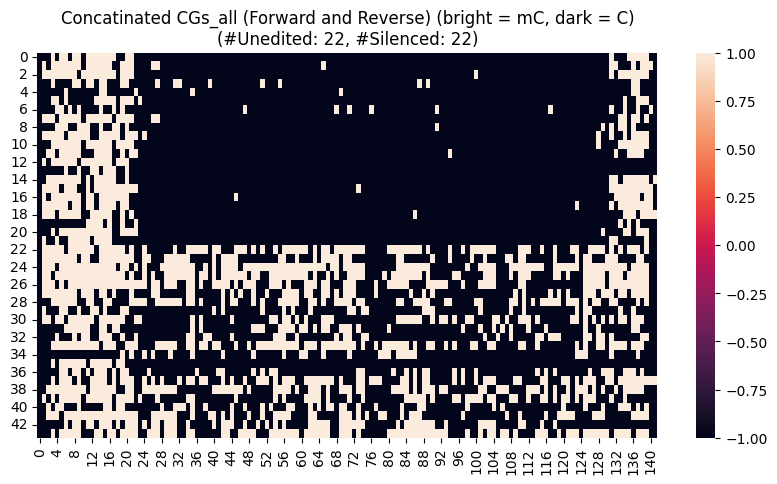

In [ ]:
# plot X_unedited_silenced 

# Heatmap of CGs_all
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(X_unedited_silenced).fillna(-1))
plt.title(f"Concatinated CGs_all (Forward and Reverse) (bright = mC, dark = C)\n(#Unedited: {CGs_all_unedited.shape[0]}, #Silenced: {CGs_all_silenced.shape[0]})")
plt.show()


In [ ]:
y_unedited_silenced = np.concatenate((y_unedited, y_silenced), axis=0)
y_unedited_silenced, y_unedited_silenced.shape

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 (44,))

In [ ]:
train_idx, test_idx = train_test_split(np.arange(y_unedited_silenced.shape[0]), train_size=.75, random_state=16, shuffle=True)
train_idx, test_idx, len(train_idx), len(test_idx)

(array([23, 22, 36, 28, 33, 38,  9, 24, 29,  8, 19, 12, 34, 42,  0, 13, 14,
        20,  2, 10, 39, 43, 37, 18, 30, 16, 32, 40, 31,  4,  1,  5, 41]),
 array([15,  3, 21, 27, 26, 25, 35, 17, 11,  7,  6]),
 33,
 11)

In [ ]:
X = pd.DataFrame(X_unedited_silenced).fillna(-1)
y = y_unedited_silenced

In [ ]:
X.iloc[16:23,:]

,0,1,2,3,4,5,6,7,8,9,...,132,133,134,135,136,137,138,139,140,141
16,-1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0
17,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,...,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0
18,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0
19,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
20,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0
21,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
22,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,...,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0


In [ ]:
X_train, X_test = X.iloc[train_idx, :], X.iloc[test_idx, :]
y_train, y_test = y[train_idx], y[test_idx]

In [ ]:
def predict_reg(f, X, y):
    preds = f.predict(X)
    preds_round = np.round(preds) # / 50) # 100-->2; 50-->1; 0-->0
    # print('preds=', preds[:16])
    # print('preds_round', preds_round[:16])
    # print('np.mean(preds_round==y)*100 =', np.mean(preds_round==y)*100)
    # print('y', y[:16])
    # preds012 = np.round(preds / 50) # 100-->2; 50-->1; 0-->0
    # print('preds012', preds012[:16])
    # print('np.mean(preds012*50==y)*100 =', np.mean(preds012*50==y)*100)
    return np.mean(preds_round==y)*100

model = LinearRegression().fit(X_train,y_train)
print("GLM: {:.2f}%".format(predict_reg(model, X_test, y_test)))

print("####")
model = DecisionTreeRegressor().fit(X_train,y_train)
print("Tree: {:.2f}%".format(predict_reg(model, X_test, y_test)))
print("####")
model = RandomForestRegressor().fit(X_train,y_train)
print("RF: {:.2f}%".format(predict_reg(model, X_test, y_test)))
print("####")
model = GradientBoostingRegressor().fit(X_train,y_train)
print("GBM: {:.2f}%".format(predict_reg(model, X_test, y_test)))
print("####")
model = MLPRegressor(max_iter=1000,hidden_layer_sizes=(50,20)).fit(X_train, y_train)
print("NN: {:.2f}%".format(predict_reg(model, X_test, y_test)))

print("####")
model = LogisticRegression(max_iter=1000, penalty="l1", solver='saga').fit(X_train,y_train)
print("Sparse GLM: {:.2f}%".format(predict_reg(model, X_test, y_test)))

GLM: 90.91%
####
Tree: 72.73%
####
RF: 90.91%
####
GBM: 81.82%
####
NN: 72.73%
####
Sparse GLM: 90.91%


In [ ]:
print(np.argsort(-np.abs(model.coef_), axis=1)+1)
print(np.abs(model.coef_)), print(len(model.coef_[0]))

[[126  57  74  55  52  43  85   1   9  10  11  12   5   2   3   4  17  18
   19  20  21  22  23  24  25  26  27  28  13   6   7   8  32  31  30  29
   37  33  35  34  40  41  42  44  45  38  39  36  48  47  46  50  51  53
   54  49  56  58  59  60  61  14  15  16  64  63  62  67  69  70  71  65
   72  73  75  76  77  78  79  66  80  81  83  82  84  86  87  88  89  90
   91  92  93  94  95  68  96  97  99  98 101 102 103 100 105 106 107 108
  109 110 111 104 112 113 115 114 117 118 119 116 120 121 123 122 124 125
  127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142]]
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.      

(None, None)

In [ ]:
celltypes = ["unedited", "silenced"]
celltypes

['unedited', 'silenced']

In [ ]:
# model.coef_

In [ ]:
np.arange(1, 11)


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
(model.coef_).shape[1]

142

In [ ]:
X_axis = np.arange(1, model.coef_.shape[1]+1)  # +1 # np.arange(10)+1
X_axis

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142])

In [ ]:
np.abs(model.coef_)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.29603974, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.3916845 , 0.        , 0.        , 0.58074945,
        0.        , 1.15549225, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.76

/tmp/ipykernel_758291/3999952595.py:9: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



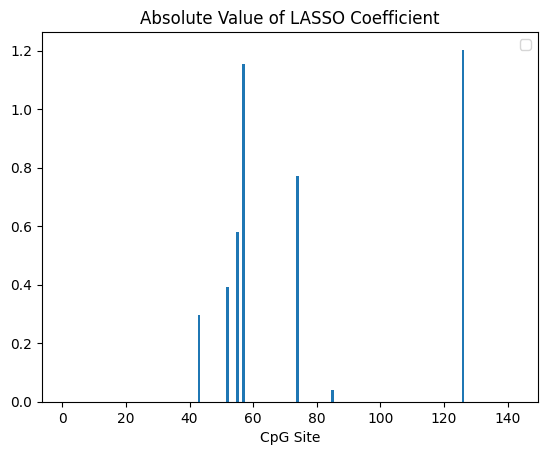

In [ ]:

X_axis =  np.arange(1, model.coef_.shape[1]+1) # +1 # np.arange(10)+1
shifts = [-.4,-.15] #,.1]

# for i in range(1,2):
    # plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i]) 
    
plt.bar(X_axis, np.abs(model.coef_[0])) #, .25) #  model.coef_) # np.abs(model.coef_)), .25) # ,label=celltypes[i])

plt.legend()
plt.title("Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
# plt.xticks(X_axis)
plt.show()

/tmp/ipykernel_758291/3309150141.py:10: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



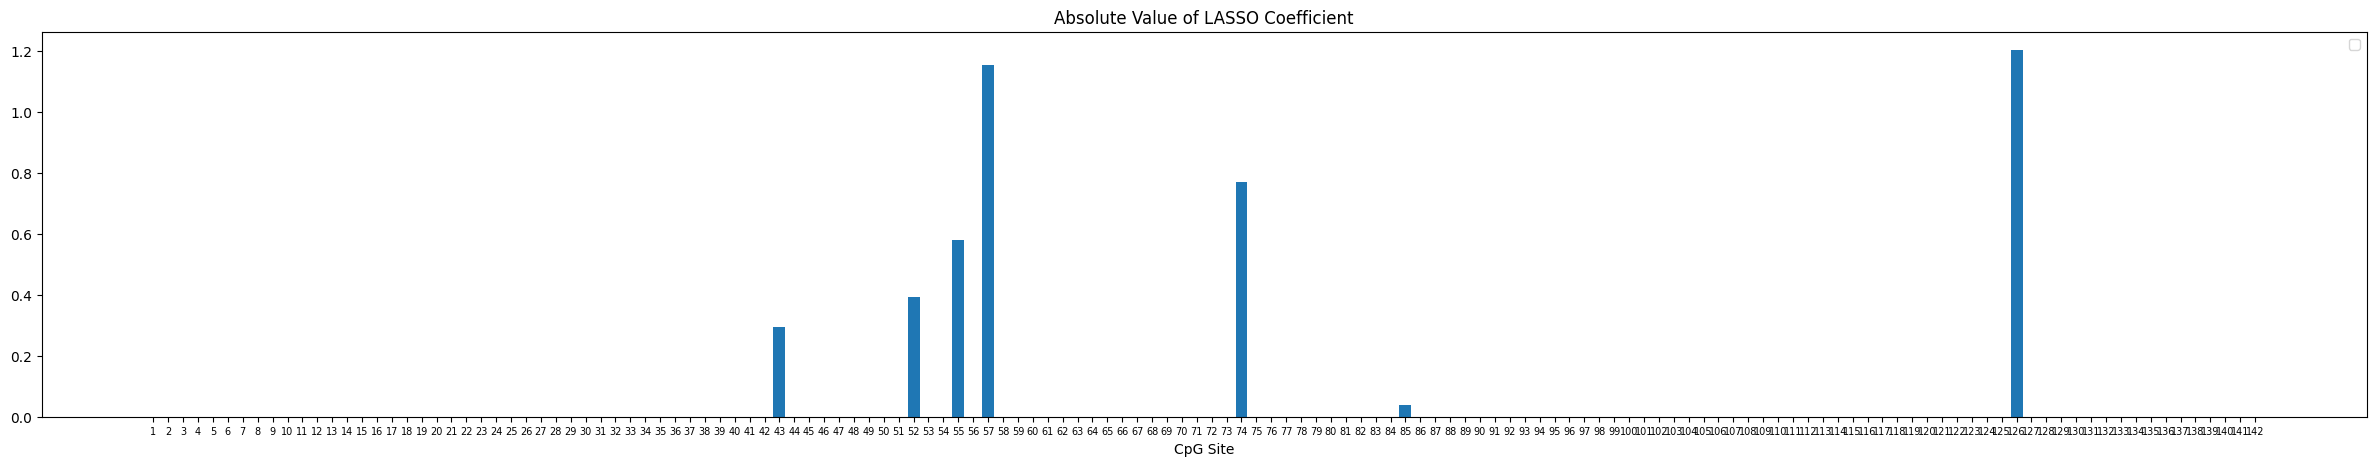

In [ ]:
plt.figure(figsize=(30, 5))
X_axis =  np.arange(1, model.coef_.shape[1]+1) # +1 # np.arange(10)+1
shifts = [-.4,-.15] #,.1]

# for i in range(1,2):
    # plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i]) 
    
plt.bar(X_axis, np.abs(model.coef_[0])) #, .25) #  model.coef_) # np.abs(model.coef_)), .25) # ,label=celltypes[i])

plt.legend()
plt.title("Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
# plt.xticks(X_axis)
plt.xticks(X_axis, size=7)
plt.show()

In [ ]:
def print_accuracy(f):
    print(f"Accuracy = {100 * np.sum(f(X_test) == y_test) / len(y_test)}%")
    time.sleep(0.5)  # to let the print get out before any progress bars


shap.initjs()

In [ ]:
# # K-nearest neighbors
# knn = sklearn.neighbors.KNeighborsClassifier()
# knn.fit(X_train, y_train)

# print_accuracy(knn.predict)
# Accuracy = 96.66666666666667 # %
# # Explain a single prediction from the test set
# explainer = shap.KernelExplainer(knn.predict_proba, X_train)
# shap_values = explainer.shap_values(X_test.iloc[0, :])
# shap.force_plot(explainer.expected_value[0], shap_values[:, 0], X_test.iloc[0, :])

# # Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
# # Explain all the predictions in the test set
# shap_values = explainer.shap_values(X_test)
# shap.force_plot(explainer.expected_value[0], shap_values[..., 0], X_test)

# # sample order by similarity

# # f(x)
# # Support vector machine with a linear kernel
# svc_linear = sklearn.svm.SVC(kernel="linear", probability=True)
# svc_linear.fit(X_train, y_train)
# print_accuracy(svc_linear.predict)

# # explain all the predictions in the test set
# explainer = shap.KernelExplainer(svc_linear.predict_proba, X_train)
# shap_values = explainer.shap_values(X_test)
# # this is multiclass so we only visualize the contributions to first class (hence index 0)
# shap.force_plot(explainer.expected_value[0], shap_values[..., 0], X_test)

Text(0.5, 1.0, 'Global SHAP Importances')

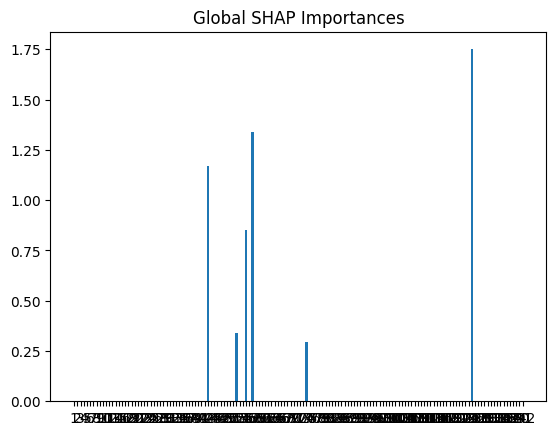

In [ ]:
# import shap
# Xshap = shap.kmeans(X_train, 20)
explainer = shap.Explainer(model.predict, X) # shap.data)
shapvals = explainer(X_test[:100])

sumabs = np.sum(np.abs(shapvals.values), axis=0)
plt.bar(X_axis, sumabs)
plt.xticks(X_axis)
plt.title("Global SHAP Importances")

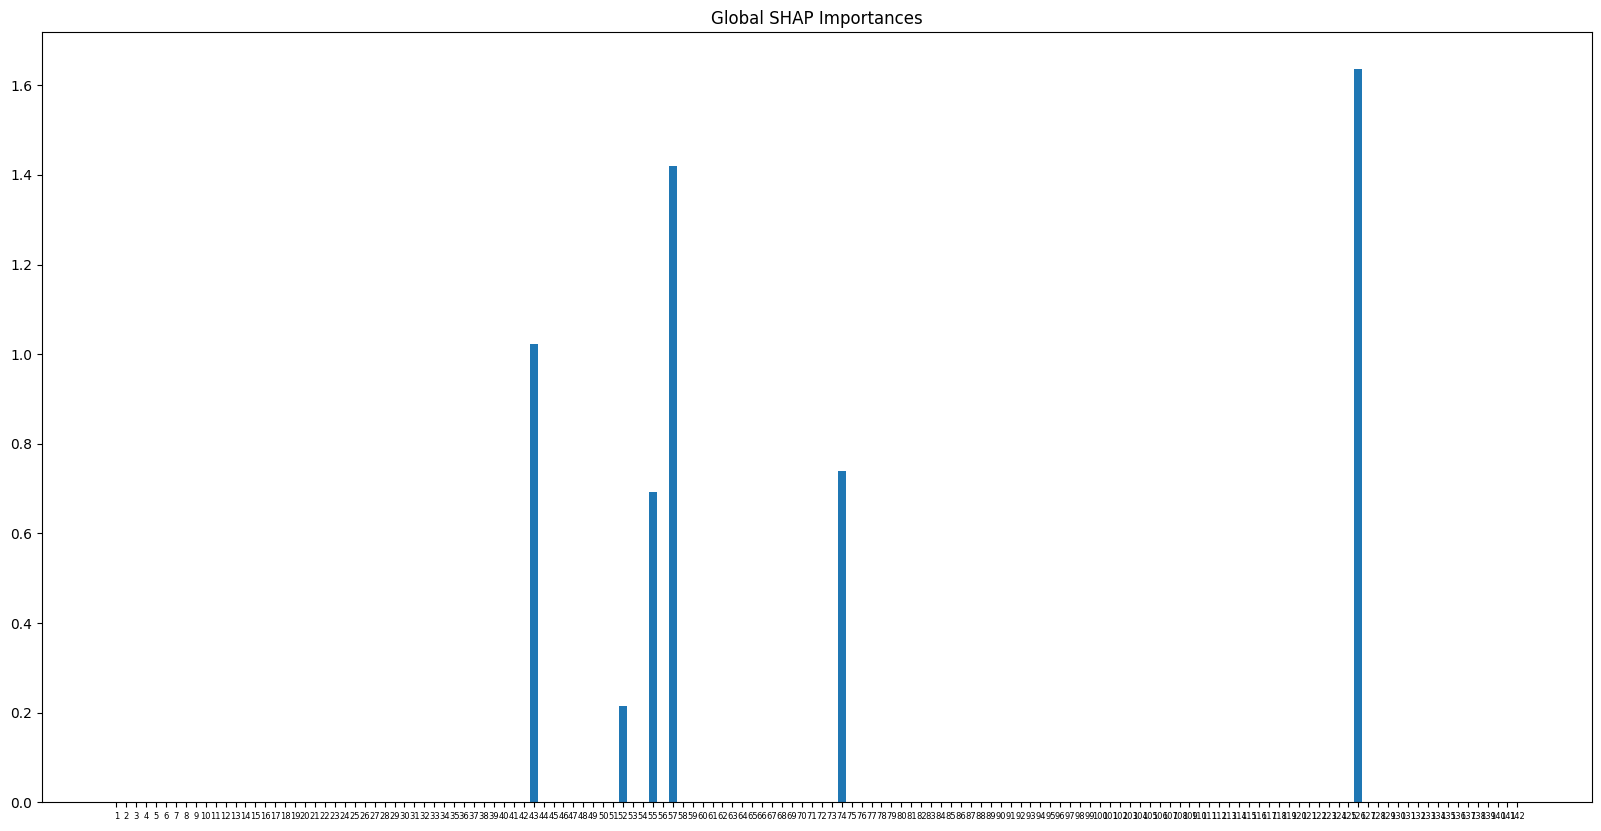

In [ ]:
plt.figure(figsize=(20, 10))  # Increase the figure size
# import shap
# Xshap = shap.kmeans(X_train, 20)
explainer = shap.Explainer(model.predict, X) # shap.data)
shapvals = explainer(X_test[:100])

sumabs = np.sum(np.abs(shapvals.values), axis=0)
plt.bar(X_axis, sumabs)
plt.title("Global SHAP Importances")

plt.xticks(X_axis, size=6)  # Adjust the size of the x-ticks for better visibility
plt.show()

# Add a 1D CNN model + interpret

In [ ]:
# # Add a 1D CNN model + interpret
# import numpy as np
# from keras.models import Sequential
# from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
# from sklearn.utils import shuffle
# from sklearn.inspection import permutation_importance

# # # Create dummy data
# # x_train = np.random.rand(1000, 10, 1)
# # y_train = np.random.rand(1000) * 100

# # Build the 1D CNN model
# model = Sequential([
#     Conv1D(32, kernel_size=3, activation='relu', input_shape=x_train.shape), #(10, 1)),
#     MaxPooling1D(pool_size=2),
#     Flatten(),
#     Dense(100, activation='relu'),
#     Dense(1)
# ])

# # Compile and train the model
# model.compile(optimizer='adam', loss='mse')
# model.fit(x_train, y_train, epochs=10, batch_size=32)

# # Evaluate feature importance
# def score_func(X, y):
#     pred = model.predict(X)
#     return np.mean(np.abs(y - pred.flatten()))

# # To fix the error, change the score_func
# def score_func(estimator, X, y):
#     pred = estimator.predict(X)
#     return np.mean(np.abs(y - pred.flatten()))

# # Create a copy of x_train reshaped for scoring
# x_train_reshaped = x_train.reshape((1000, 10))

# # Calculate permutation importance
# results = permutation_importance(model, x_train_reshaped, y_train, scoring=score_func)

# # Output feature importance
# importance = results.importances_mean
# for i, imp in enumerate(importance):
#     print(f"Feature {i+1} importance: {imp}")

To enhance the provided code with a test set and plotting of evaluation metrics, specifically the mean squared error (MSE) on both training and test datasets, you can follow these steps. I'll use Matplotlib for plotting.


In [ ]:

# import numpy as np
# import matplotlib.pyplot as plt
# from keras.models import Sequential
# from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
# from sklearn.model_selection import train_test_split

# # Create dummy data
# x = np.random.rand(1200, 10, 1)
# y = np.random.rand(1200) * 100

# # Split the data into training and test sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Build the 1D CNN model
# model = Sequential([
#     Conv1D(32, kernel_size=3, activation='relu', input_shape=(10, 1)),
#     MaxPooling1D(pool_size=2),
#     Flatten(),
#     Dense(100, activation='relu'),
#     Dense(1)
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mse')

# # Train the model and save history
# history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# # Plot the training and validation loss
# plt.plot(history.history['loss'], label='Train MSE')
# plt.plot(history.history['val_loss'], label='Test MSE')
# plt.title('Model MSE')
# plt.ylabel('Mean Squared Error')
# plt.xlabel('Epoch')
# plt.legend(loc='upper right')
# plt.show()

In [ ]:
# Evaluate feature importance
# def score_func(X, y):
#     pred = model.predict(X)
#     return np.mean(np.abs(y - pred.flatten()))
# # To fix the error, change the score_func:
# def score_func(estimator, X, y):
#     pred = estimator.predict(X)
#     return np.mean(np.abs(y - pred.flatten()))

def score_func(estimator, X, y):
    pred = estimator.predict(X)
    return np.mean(np.abs(y - pred.flatten()))

# # # Create a copy of x_train reshaped for scoring
# X_train_reshaped = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1]))

# # Calculate permutation importance
# results = permutation_importance(model, X_train_reshaped, y_train, scoring=score_func)
# Use X_train directly without reshaping
results = permutation_importance(model, np.asarray(X_train), np.asarray(y_train), scoring=score_func)


# Output feature importance
importance = results.importances_mean
for i, imp in enumerate(importance):
    print(f"Feature {i+1} importance: {imp}")

Feature 1 importance: 0.0
Feature 2 importance: 0.0
Feature 3 importance: 0.0
Feature 4 importance: 0.0
Feature 5 importance: 0.0
Feature 6 importance: 0.0
Feature 7 importance: 0.0
Feature 8 importance: 0.0
Feature 9 importance: 0.0
Feature 10 importance: 0.0
Feature 11 importance: 0.0
Feature 12 importance: 0.0
Feature 13 importance: 0.0
Feature 14 importance: 0.0
Feature 15 importance: 0.0
Feature 16 importance: 0.0
Feature 17 importance: 0.0
Feature 18 importance: 0.0
Feature 19 importance: 0.0
Feature 20 importance: 0.0
Feature 21 importance: 0.0
Feature 22 importance: 0.0
Feature 23 importance: 0.0
Feature 24 importance: 0.0
Feature 25 importance: 0.0
Feature 26 importance: 0.0
Feature 27 importance: 0.0
Feature 28 importance: 0.0
Feature 29 importance: 0.0
Feature 30 importance: 0.0
Feature 31 importance: 0.0
Feature 32 importance: 0.0
Feature 33 importance: 0.0
Feature 34 importance: 0.0
Feature 35 importance: 0.0
Feature 36 importance: 0.0
Feature 37 importance: 0.0
Feature 38

In [ ]:
import numpy as np
from sklearn.inspection import permutation_importance

# Ensure X_train is a NumPy array
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

# Define scoring function
def score_func(estimator, X, y):
    pred = estimator.predict(X)
    return np.mean(np.abs(y - pred.flatten()))

# Check shape before calling permutation_importance
print("X_train shape:", X_train.shape)

# Calculate permutation importance
results = permutation_importance(model, X_train, y_train, scoring=score_func)

# Output feature importance
importance = results.importances_mean
for i, imp in enumerate(importance):
    print(f"Feature {i+1} importance: {imp}")


X_train shape: (33, 142)
Feature 1 importance: 0.0
Feature 2 importance: 0.0
Feature 3 importance: 0.0
Feature 4 importance: 0.0
Feature 5 importance: 0.0
Feature 6 importance: 0.0
Feature 7 importance: 0.0
Feature 8 importance: 0.0
Feature 9 importance: 0.0
Feature 10 importance: 0.0
Feature 11 importance: 0.0
Feature 12 importance: 0.0
Feature 13 importance: 0.0
Feature 14 importance: 0.0
Feature 15 importance: 0.0
Feature 16 importance: 0.0
Feature 17 importance: 0.0
Feature 18 importance: 0.0
Feature 19 importance: 0.0
Feature 20 importance: 0.0
Feature 21 importance: 0.0
Feature 22 importance: 0.0
Feature 23 importance: 0.0
Feature 24 importance: 0.0
Feature 25 importance: 0.0
Feature 26 importance: 0.0
Feature 27 importance: 0.0
Feature 28 importance: 0.0
Feature 29 importance: 0.0
Feature 30 importance: 0.0
Feature 31 importance: 0.0
Feature 32 importance: 0.0
Feature 33 importance: 0.0
Feature 34 importance: 0.0
Feature 35 importance: 0.0
Feature 36 importance: 0.0
Feature 37 i

In [ ]:
print("X_train shape:", X_train.shape)  # Should be (num_samples, num_features)
print("y_train shape:", y_train.shape)  # Should be (num_samples,)

X_train shape: (33, 142)
y_train shape: (33,)


<Figure size 2000x2000 with 0 Axes>

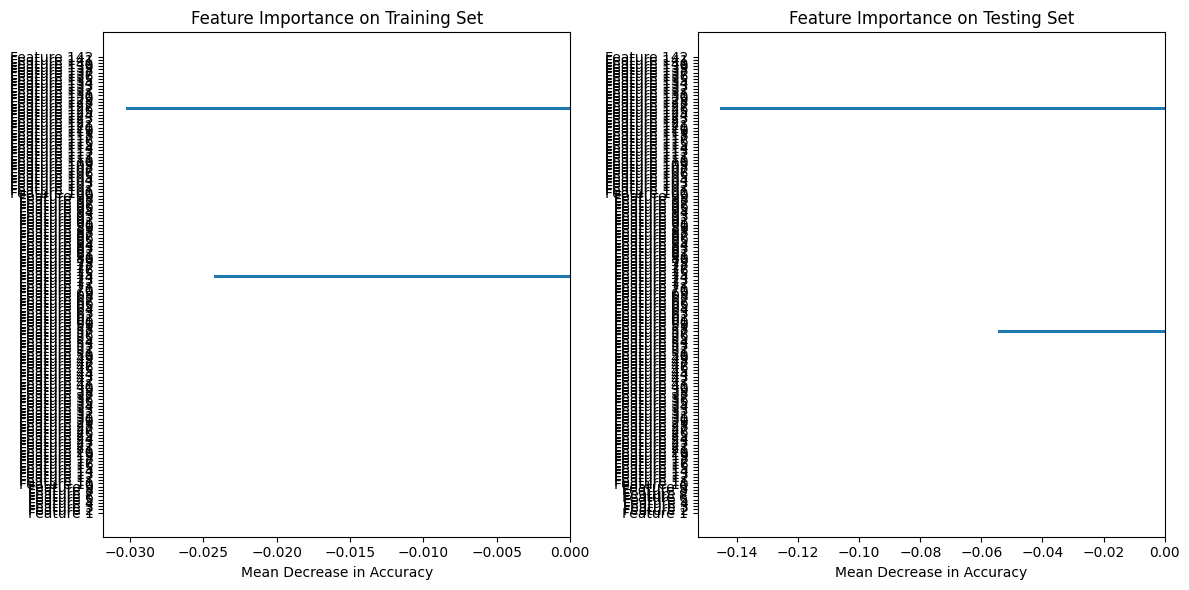

In [ ]:
# To visualize feature importance for both training and testing datasets, we'll use bar plots to show the impact of each feature. Here is how you can enhance your Python script to include these visualizations using Matplotlib:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

plt.figure(figsize=(20, 20))  # Increase the figure size


# # Assume x and y are your full dataset and labels
# x, y = np.random.rand(1000, 10, 1), np.random.rand(1000) * 100
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Reshape for scoring
X_train_reshaped = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1]))
X_test_reshaped = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1]))

# Calculate permutation importance on training data
train_results = permutation_importance(model, X_train_reshaped, y_train, scoring=score_func)
test_results = permutation_importance(model, X_test_reshaped, y_test, scoring=score_func)

# Plotting
features = [f"Feature {i+1}" for i in range(X_train_reshaped.shape[1])]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(features, train_results.importances_mean)
plt.title('Feature Importance on Training Set')
plt.xlabel('Mean Decrease in Accuracy')

plt.subplot(1, 2, 2)
plt.barh(features, test_results.importances_mean)
plt.title('Feature Importance on Testing Set')
plt.xlabel('Mean Decrease in Accuracy')

plt.tight_layout()
plt.show()

<Figure size 1000x10000 with 0 Axes>

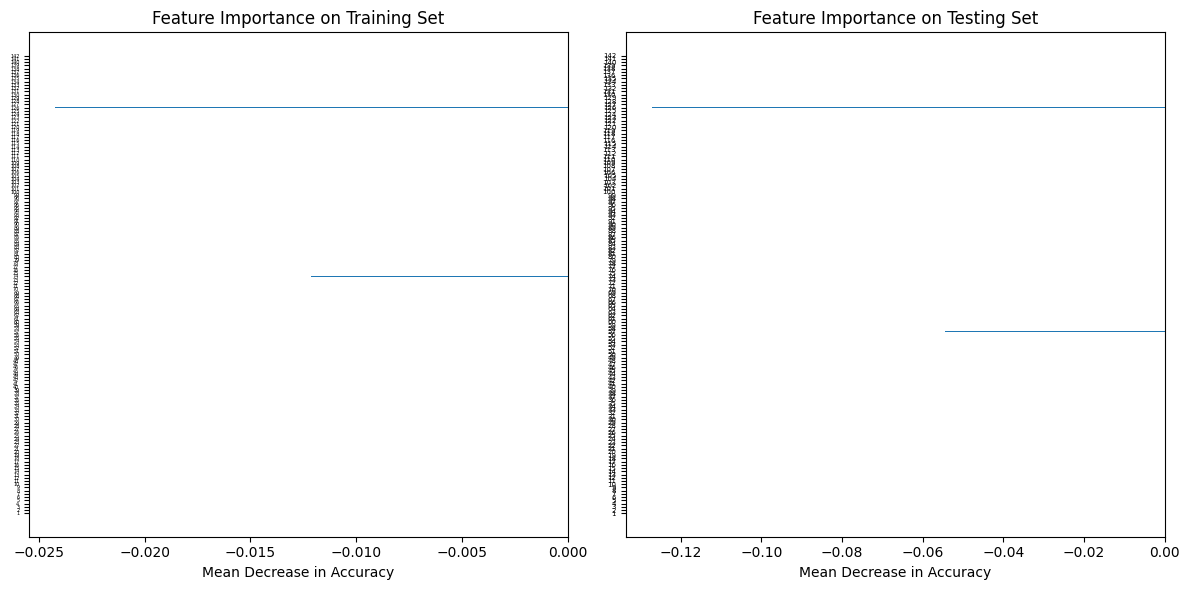

In [ ]:
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 100))  # Increase the figure size

# Reshape for scoring
X_train_reshaped = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1]))
X_test_reshaped = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1]))

# Calculate permutation importance on training data
train_results = permutation_importance(model, X_train_reshaped, y_train, scoring=score_func)
test_results = permutation_importance(model, X_test_reshaped, y_test, scoring=score_func)

# Plotting
# features = [f"Feature {i+1}" for i in range(X_train_reshaped.shape[1])]
features = [f"{i+1}" for i in range(X_train_reshaped.shape[1])]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(features, train_results.importances_mean, height=0.2)  # Adjust height for better readability
plt.yticks(fontsize=3.5)
plt.title('Feature Importance on Training Set')
plt.xlabel('Mean Decrease in Accuracy')

plt.subplot(1, 2, 2)
plt.barh(features, test_results.importances_mean, height=0.2)  # Adjust height for better readability
plt.yticks(fontsize=5)
plt.title('Feature Importance on Testing Set')
plt.xlabel('Mean Decrease in Accuracy')

plt.tight_layout()
plt.show()

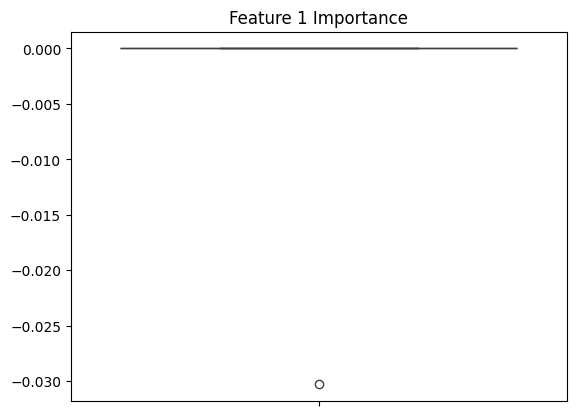

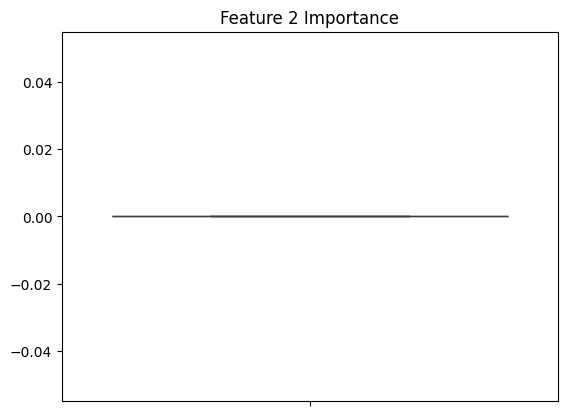

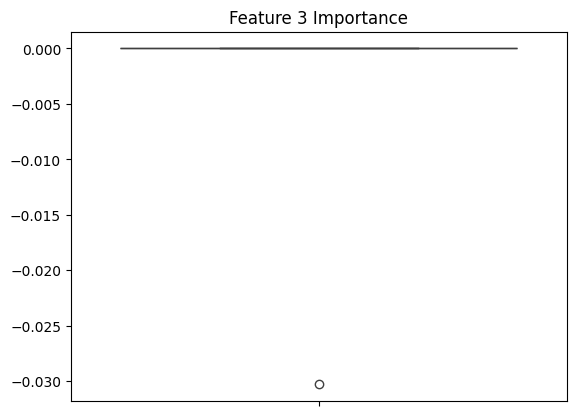

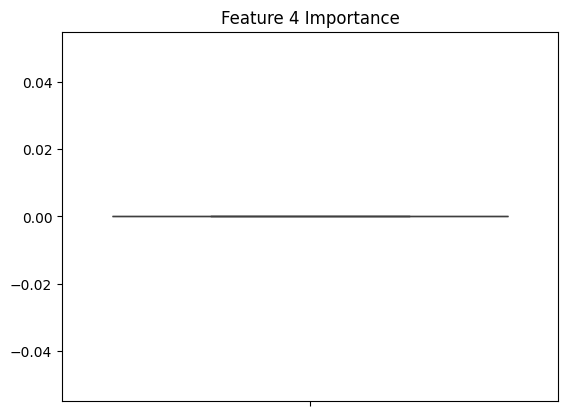

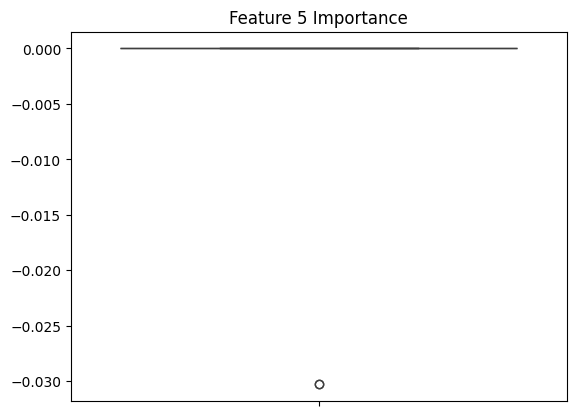

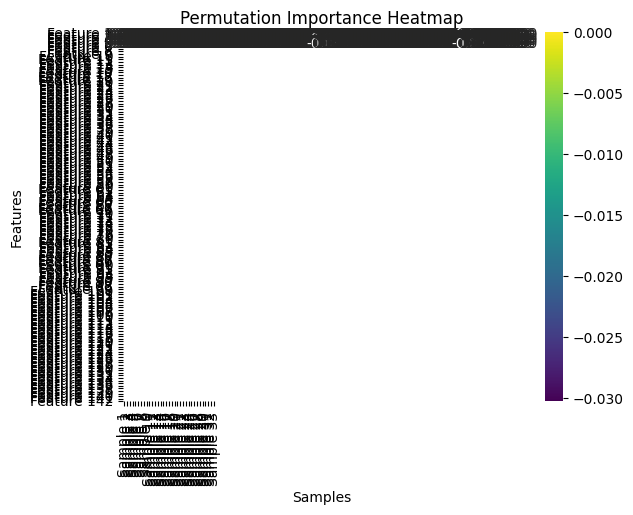

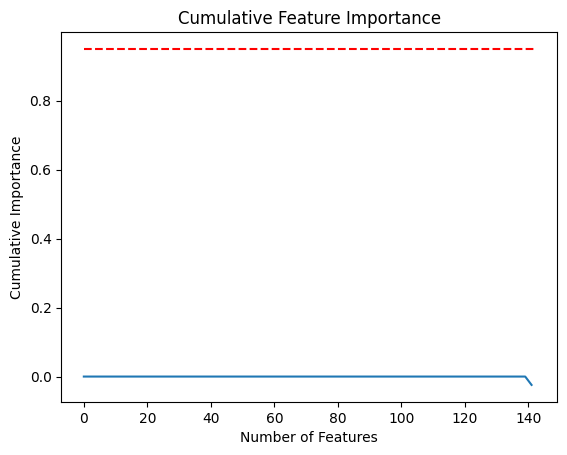

In [ ]:
# To enhance the visualization of feature importance in your machine learning model, you can add a few more types of plots besides the basic bar plot. Here are a few additional types of visualizations you can implement:

# To enhance the visualization of feature importance in your machine learning model, you can add a few more types of plots besides the basic bar plot. Here are a few additional types of visualizations you can implement:

# Box Plot:
# A box plot can show the distribution of permutation importances across multiple runs, giving you a sense of variability in feature importance.
import seaborn as sns

# # Calculate permutation importance on training data
# train_results = permutation_importance(model, x_train_reshaped, y_train, scoring=score_func)
# test_results = permutation_importance(model, x_test_reshaped, y_test, scoring=score_func)

train_results = permutation_importance(model, X_train, y_train, scoring=score_func)
test_results = permutation_importance(model, X_test, y_test, scoring=score_func)

# Assuming 'results' is the output from permutation_importance
# for i in range(x_train_reshaped.shape[1]):
#     sns.boxplot(data=results.importances[:, i], orient='v')
#     plt.title(f'Feature {i+1} Importance')
#     plt.show()
# Correctly access the importances array
num_features = results.importances.shape[1]  # This ensures you are within the correct range

for i in range(num_features):
    sns.boxplot(data=results.importances[:, i], orient='v')
    plt.title(f'Feature {i+1} Importance')
    plt.show()

# Feature Importance Heatmap:
# If your dataset isn't too large, you can visualize the importance across multiple features and samples using a heatmap.
import seaborn as sns
# Create a heatmap of the feature importance scores
sns.heatmap(results.importances.T, annot=True, cmap='viridis', fmt=".3f",
            xticklabels=[f"Sample {i+1}" for i in range(X_train.shape[0])],
            yticklabels=[f"Feature {i+1}" for i in range(X_train.shape[1])])
plt.title('Permutation Importance Heatmap')
plt.xlabel('Samples')
plt.ylabel('Features')
plt.show()

# Cumulative Importance Plot:
# This plot can help identify the number of features required to reach a certain threshold of total importance.
import numpy as np
import matplotlib.pyplot as plt

# Calculate cumulative importance
sorted_idx = np.argsort(results.importances_mean)[::-1]
cumulative_importance = np.cumsum(results.importances_mean[sorted_idx])

plt.plot(cumulative_importance)
plt.hlines(y=0.95, xmin=0, xmax=len(cumulative_importance), color='r', linestyles='dashed')
plt.title('Cumulative Feature Importance')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.show()
# These visualizations provide different perspectives on feature importance, helping you to better understand which features contribute most to the model and how stable their contributions are across different data subsets.


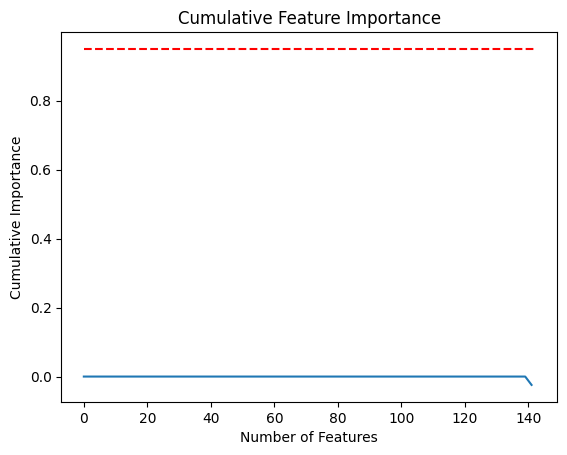

In [ ]:
# Calculate cumulative importance
sorted_idx = np.argsort(results.importances_mean)[::-1]
cumulative_importance = np.cumsum(results.importances_mean[sorted_idx])

plt.plot(cumulative_importance)
plt.hlines(y=0.95, xmin=0, xmax=len(cumulative_importance), color='r', linestyles='dashed')
plt.title('Cumulative Feature Importance')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.show()

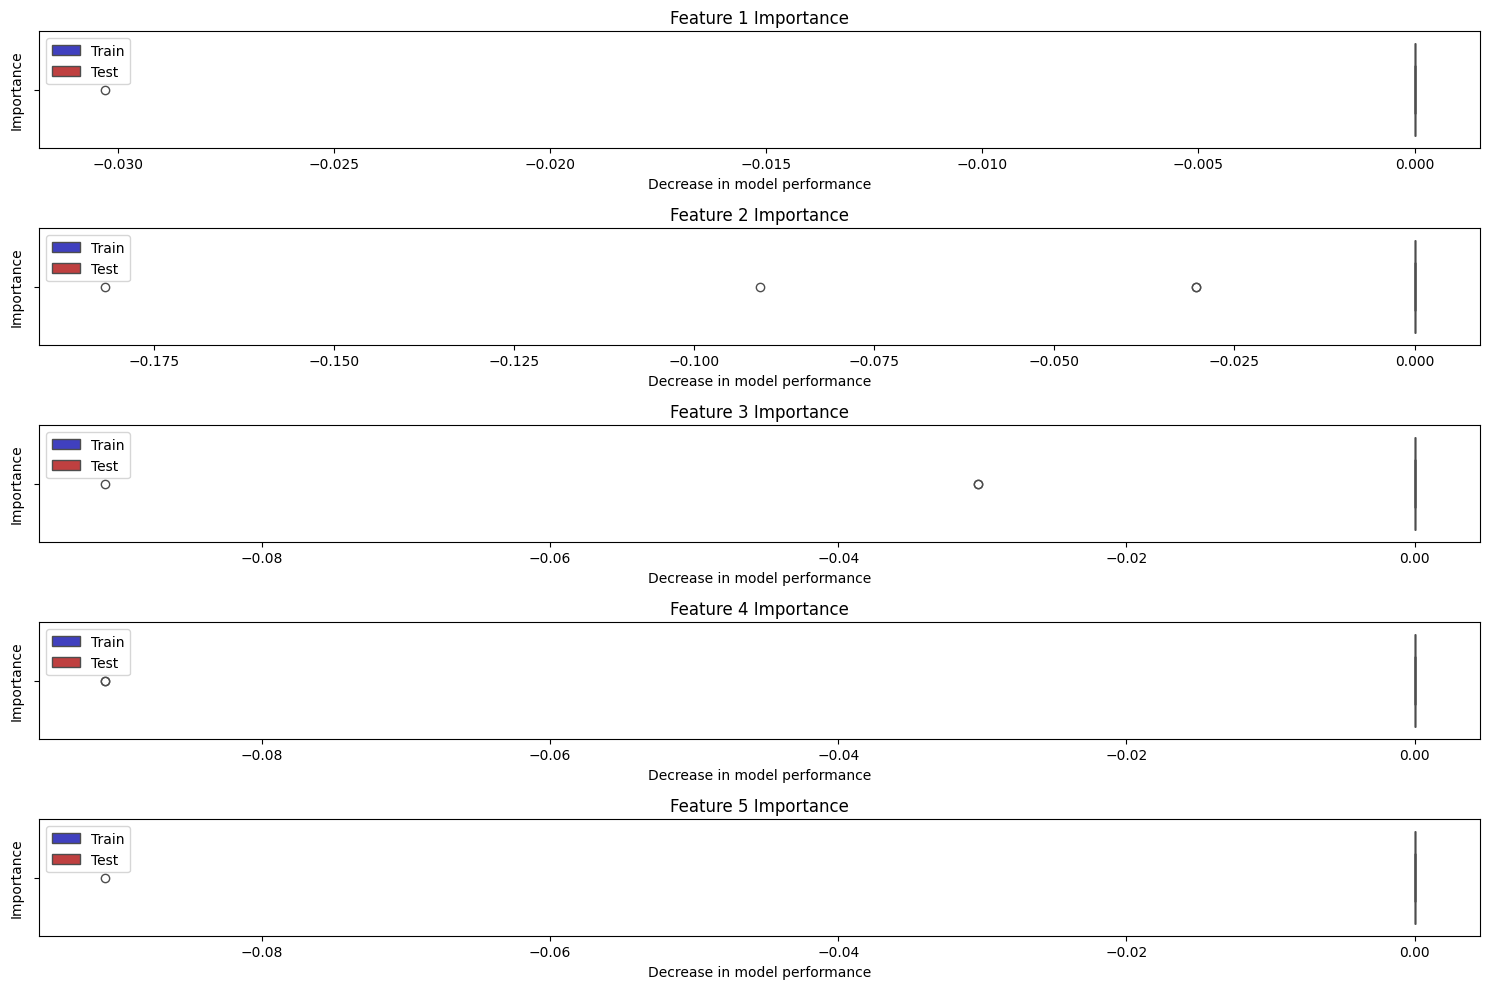

In [ ]:
# To properly visualize permutation importance for both training and testing data in your machine learning model, let's refine the existing code to ensure correct use of both train_results and test_results. We will also plot these results side by side for each feature for better comparison.

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train_results' and 'test_results' are already calculated
num_features = train_results.importances.shape[1]

plt.figure(figsize=(15, 10))
for i in range(num_features):
    plt.subplot(num_features, 1, i + 1)
    # Plotting training data importance
    sns.boxplot(data=train_results.importances[:, i], color='blue', orient='h', saturation=0.5)
    # Plotting test data importance
    sns.boxplot(data=test_results.importances[:, i], color='red', orient='h', saturation=0.5)
    plt.title(f'Feature {i+1} Importance')
    plt.xlabel('Decrease in model performance')
    plt.ylabel('Importance')
    plt.legend(['Train', 'Test'])
plt.tight_layout()
plt.show()

# Explanation:
# Box Plot Modifications: Each feature's importance from both the training and testing datasets is plotted side by side to directly compare their distributions and see how the model reacts to the shuffling of each feature set.
# Layout Adjustments: Using plt.subplot() to plot each feature's importance on a separate subplot for clarity.
# Color Coding: Different colors for training and testing datasets help in distinguishing between the two, enhancing visual understanding.
# This code modification will help you clearly visualize how the permutation importance varies between training and testing datasets, thereby providing insights into model generalization and potential overfitting.

In [ ]:
features, test_results.importances_mean


(['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '39',
  '40',
  '41',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '48',
  '49',
  '50',
  '51',
  '52',
  '53',
  '54',
  '55',
  '56',
  '57',
  '58',
  '59',
  '60',
  '61',
  '62',
  '63',
  '64',
  '65',
  '66',
  '67',
  '68',
  '69',
  '70',
  '71',
  '72',
  '73',
  '74',
  '75',
  '76',
  '77',
  '78',
  '79',
  '80',
  '81',
  '82',
  '83',
  '84',
  '85',
  '86',
  '87',
  '88',
  '89',
  '90',
  '91',
  '92',
  '93',
  '94',
  '95',
  '96',
  '97',
  '98',
  '99',
  '100',
  '101',
  '102',
  '103',
  '104',
  '105',
  '106',
  '107',
  '108',
  '109',
  '110',
  '111',
  '112',
  '113',
  '114',
  '115',
  '116',
  '117',
  '118',
  '119',
  '120',
  '121',
  '122',
  '123',
 

In [ ]:
X_axis


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142])

/tmp/ipykernel_758291/1219228298.py:5: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



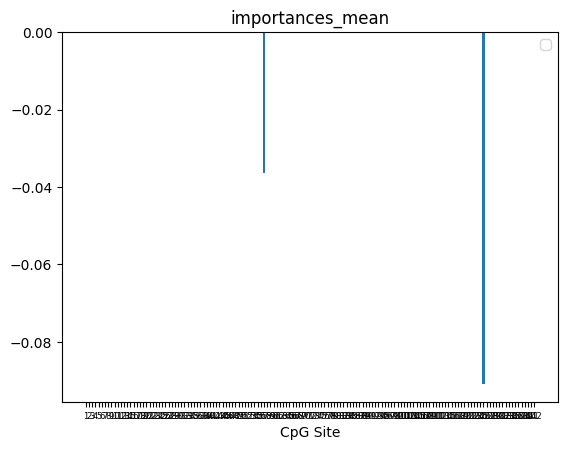

In [ ]:
# for i in range(1,3):
    # plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.bar(X_axis, test_results.importances_mean) # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])

plt.legend()
plt.title("importances_mean")# Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis, size=6)
plt.show()

In [ ]:
shifts

[-0.4, -0.15]

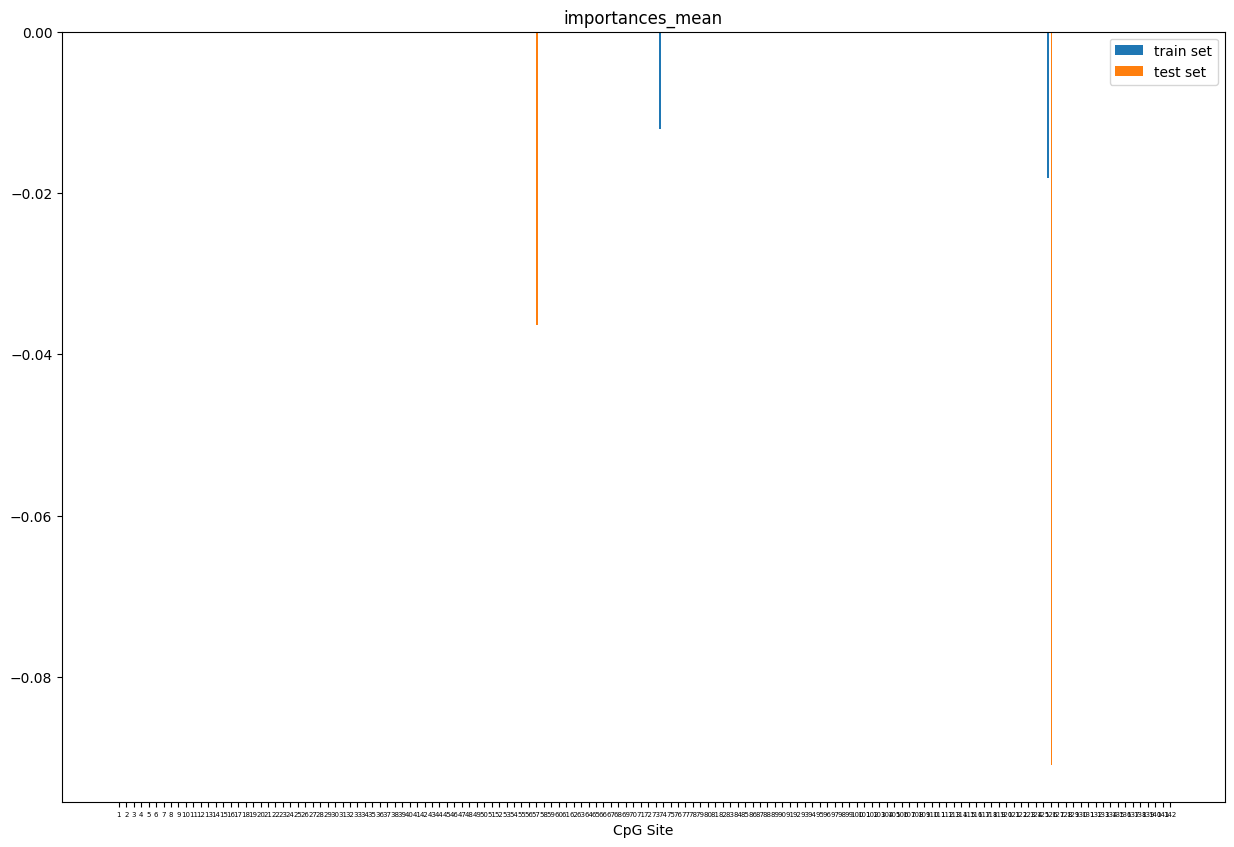

In [ ]:
shifts =  [-0.4, 0.1]
# [-0.4, -0.15, 0.1]
# for i in range(1,3):
#     plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.figure(figsize=(15, 10))

plt.bar(X_axis+shifts[0], train_results.importances_mean, .25,label="train set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.bar(X_axis+shifts[1], test_results.importances_mean, .25,label="test set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])

plt.legend()
plt.title("importances_mean")# Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis, size=5)
plt.show()

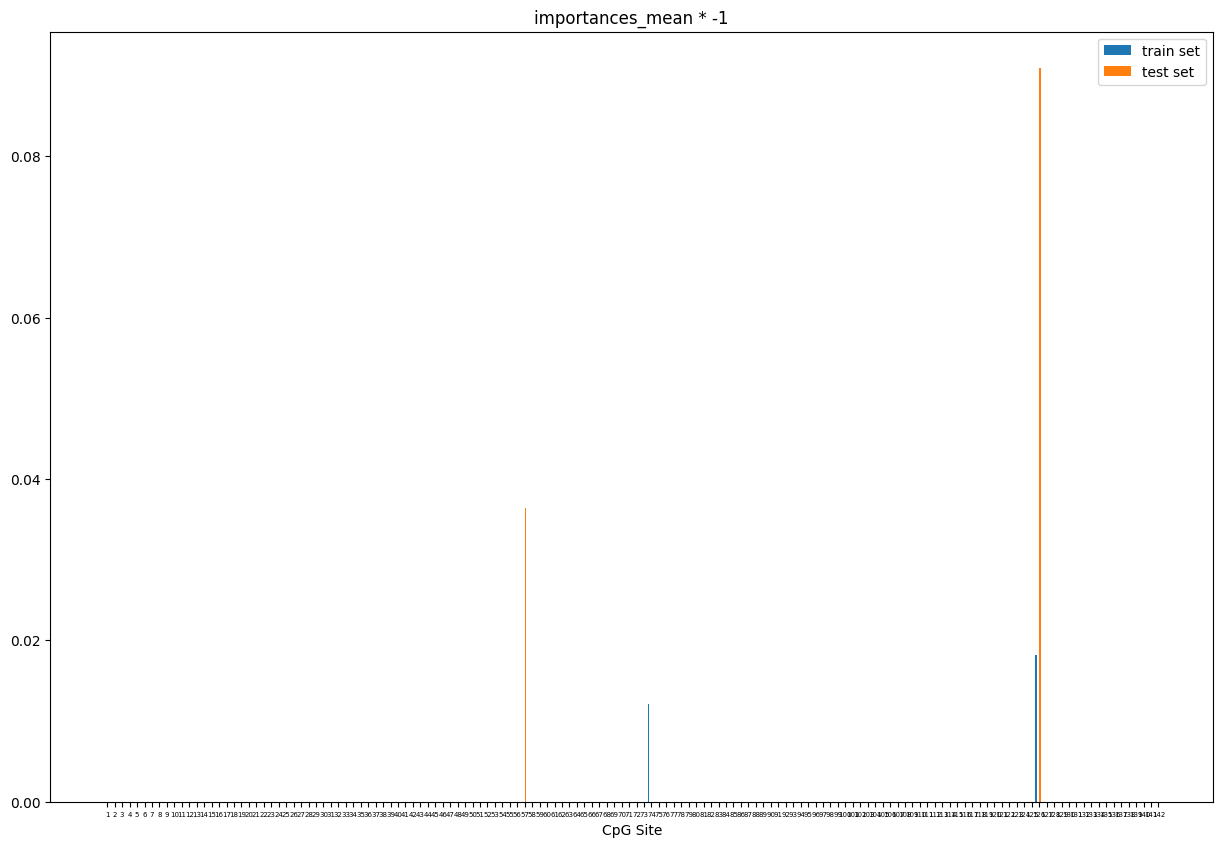

In [ ]:
plt.figure(figsize=(15, 10))
plt.bar(X_axis+shifts[0], (-1)*train_results.importances_mean, .25,label="train set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.bar(X_axis+shifts[1], (-1)*test_results.importances_mean, .25,label="test set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])

plt.legend()
plt.title("importances_mean * -1")# Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis, size=5)
plt.show()

In [ ]:
# plt.figure(figsize=(15, 10))
# plt.bar(X_axis+shifts[0], (-1)*train_results.importances_mean, .25,label="train set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
# plt.bar(X_axis+shifts[1], (-1)*test_results.importances_mean, .25,label="test set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])

# plt.legend()
# plt.title("importances_mean * -1")# Absolute Value of LASSO Coefficient")
# plt.xlabel("CpG Site")
# plt.xticks(X_axis, size=5)
# plt.show()

In [ ]:
print(np.argsort(-np.abs(model.coef_), axis=1)+1)
print(np.abs(model.coef_))

[[126  57  74  55  52  43  85   1   9  10  11  12   5   2   3   4  17  18
   19  20  21  22  23  24  25  26  27  28  13   6   7   8  32  31  30  29
   37  33  35  34  40  41  42  44  45  38  39  36  48  47  46  50  51  53
   54  49  56  58  59  60  61  14  15  16  64  63  62  67  69  70  71  65
   72  73  75  76  77  78  79  66  80  81  83  82  84  86  87  88  89  90
   91  92  93  94  95  68  96  97  99  98 101 102 103 100 105 106 107 108
  109 110 111 104 112 113 115 114 117 118 119 116 120 121 123 122 124 125
  127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142]]
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.      

In [ ]:
celltypes

['unedited', 'silenced']

In [ ]:
# for i in range(2):
#     plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
# plt.legend()
# plt.title("Absolute Value of LASSO Coefficient")
# plt.xlabel("CpG Site")
# plt.xticks(X_axis)
# plt.show()

In [ ]:
# train_idx, test_idx = train_test_split(np.arange(y_unedited_silenced.shape[0]), train_size=.75, random_state=16)
# train_idx, test_idx

In [ ]:
# # To visualize feature importance for both training and testing datasets, we'll use bar plots to show the impact of each feature. Here is how you can enhance your Python script to include these visualizations using Matplotlib:

# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.inspection import permutation_importance
# from sklearn.model_selection import train_test_split

# # # Assume x and y are your full dataset and labels
# # x, y = np.random.rand(1000, 10, 1), np.random.rand(1000) * 100
# # x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Reshape for scoring
# x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1]))
# x_test_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1]))

# # Calculate permutation importance on training data
# train_results = permutation_importance(model, x_train_reshaped, y_train, scoring=score_func)
# test_results = permutation_importance(model, x_test_reshaped, y_test, scoring=score_func)

# # Plotting
# features = [f"Feature {i+1}" for i in range(x_train_reshaped.shape[1])]
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.barh(features, train_results.importances_mean)
# plt.title('Feature Importance on Training Set')
# plt.xlabel('Mean Decrease in Accuracy')

# plt.subplot(1, 2, 2)
# plt.barh(features, test_results.importances_mean)
# plt.title('Feature Importance on Testing Set')
# plt.xlabel('Mean Decrease in Accuracy')

# plt.tight_layout()
# plt.show()